In [683]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np
from scipy import stats
import os, warnings
warnings.filterwarnings(action='ignore')

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [684]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [685]:
import pandas as pd

train = pd.read_csv("park_data/train_df.csv")
test = pd.read_csv("park_data/test_df.csv")
sub = pd.read_csv("park_data/sample_submission.csv")
age = pd.read_csv("park_data/age_gender_info.csv")
train.shape, test.shape, sub.shape, age.shape

((2869, 15), (1008, 14), (150, 2), (16, 23))

In [686]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [687]:
train.head(30)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0


In [688]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']

In [689]:
# train = train.loc[~(train['지역'] =='서울특별시'),:]

In [690]:
# train.reset_index(drop=True, inplace=True)

In [691]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [692]:
train_df = train[['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']]

In [693]:
train_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0
2865,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0
2866,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0
2867,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0


## Age 정보 추가

In [694]:
train.shape, test.shape

((2869, 15), (1008, 14))

In [695]:
train = pd.merge(train,age)
test = pd.merge(test,age)

In [696]:
train.shape, test.shape

((2869, 37), (1008, 36))

In [697]:
len(test['단지코드'].unique())

147

((array([-3.48993426, -3.24543014, -3.11017715, ...,  3.11017715,
          3.24543014,  3.48993426]),
  array([2.56494936, 2.56494936, 2.56494936, ..., 7.84384864, 7.84384864,
         7.84384864])),
 (0.8805142620262187, 5.974051234508852, 0.9839921058038086))

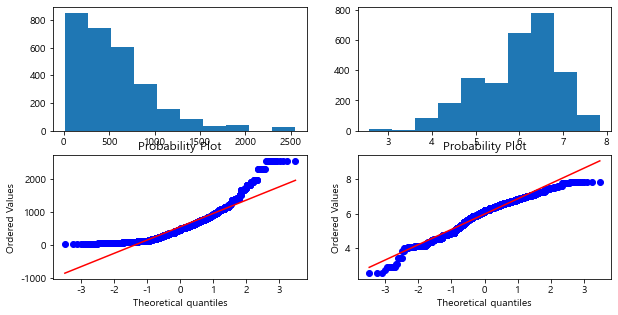

In [698]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(train['등록차량수'])
ax[0][1].hist(np.log(train['등록차량수']))

stats.probplot(train['등록차량수'], plot=ax[1][0])
stats.probplot(np.log(train['등록차량수']), plot=ax[1][1])

In [699]:
all_df = pd.concat([train, test], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_df
all_df.shape

(3877, 36)

In [700]:
all_df.shape

(3877, 36)

In [701]:
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,아파트,세종특별자치시,행복주택,38.20,68,23.0,J,30101000,...,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112
3873,C1229,453,아파트,세종특별자치시,행복주택,38.20,8,23.0,J,30101000,...,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112
3874,C1229,453,아파트,세종특별자치시,행복주택,38.25,3,23.0,J,30101000,...,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112
3875,C1229,453,아파트,세종특별자치시,행복주택,38.28,4,23.0,J,30101000,...,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112


## 결측치 처리

### 자격유형

In [702]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

In [703]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [704]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3256,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3257,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3258,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3260,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [705]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3455,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3456,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


## 전용면적 처리

In [706]:
# all_df['전용면적'] = all_df['전용면적']//5*5

In [707]:
# idx = all_df[all_df['전용면적']>100].index
# all_df.loc[idx,'전용면적'] = 100

In [708]:
# idx = all_df[all_df['전용면적']<15].index
# all_df.loc[idx, '전용면적'] = 15

In [709]:
# all_df.전용면적.value_counts()

## 자격유형 & 공급유형 묶기

In [710]:
# all_df.loc[all_df.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
# all_df.loc[all_df.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

In [711]:
# all_df.loc[all_df.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
# all_df.loc[all_df.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
# all_df.loc[all_df.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'


In [712]:
# all_df.loc[all_df['자격유형'].isnull() & all_df['단지코드'].isin(['C2411']) ,'자격유형'] = 'A'
# all_df.loc[all_df['자격유형'].isnull() & all_df['단지코드'].isin(['C2253']) ,'자격유형'] = '영구임대_공급대상'

In [713]:
all_df.loc[all_df['자격유형'].isnull() & all_df['단지코드'].isin(['C2411']) ,'자격유형'] = 'A'
all_df.loc[all_df['자격유형'].isnull() & all_df['단지코드'].isin(['C2253']) ,'자격유형'] = 'C'

In [714]:
# all_df.loc[ 3259, "자격유형"] = 'A'
# all_df.loc[ 3454, "자격유형"] = 'C'

In [715]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

### 임대보증금

In [716]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)

(18, 36)
변경후
(0, 36)


In [717]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

749
변경후
0


### 임대료

In [718]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)

(21, 36)
변경후
(0, 36)


In [719]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

749
변경후
0


In [720]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [721]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3877 non-null   object 
 1   총세대수        3877 non-null   int64  
 2   임대건물구분      3877 non-null   object 
 3   지역          3877 non-null   object 
 4   공급유형        3877 non-null   object 
 5   전용면적        3877 non-null   float64
 6   전용면적별세대수    3877 non-null   int64  
 7   공가수         3877 non-null   float64
 8   자격유형        3877 non-null   object 
 9   임대보증금       3877 non-null   int32  
 10  임대료         3877 non-null   int32  
 11  10분내지하철수    3632 non-null   float64
 12  10분내버스정류장수  3877 non-null   float64
 13  단지내주차면수     3877 non-null   float64
 14  10대미만(여자)   3877 non-null   float64
 15  10대미만(남자)   3877 non-null   float64
 16  10대(여자)     3877 non-null   float64
 17  10대(남자)     3877 non-null   float64
 18  20대(여자)     3877 non-null   float64
 19  20대(남자)     3877 non-null  

### 10분내 지하철 수

In [722]:
#일단 Nan 0으로 처리
print(all_df['10분내지하철수'].isnull().sum())
all_df['10분내지하철수'] = all_df['10분내지하철수'].fillna(0)
print('변경후')
print(all_df['10분내지하철수'].isnull().sum())

245
변경후
0


In [723]:
# sub_tn = pd.read_csv("data/train(subway).csv")
# sub_tt = pd.read_csv("data/test(subway).csv")

In [724]:
# all_sub_df = pd.concat([sub_tn['지하철수'], sub_tt['지하철수']], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
# all_sub_df.shape

In [725]:
# all_df['10분내지하철수'] = all_sub_df

In [726]:
# all_df.head()

In [727]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [728]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.001356
전용면적          0.002800
전용면적별세대수      0.040957
공가수           0.038177
임대보증금         0.124743
임대료           0.084311
10분내지하철수      0.057391
10분내버스정류장수    1.000000
단지내주차면수       0.102414
10대미만(여자)     0.149232
10대미만(남자)     0.146037
10대(여자)       0.028896
10대(남자)       0.023680
20대(여자)      -0.029804
20대(남자)      -0.056424
30대(여자)       0.128756
30대(남자)       0.116142
40대(여자)       0.120484
40대(남자)       0.141870
50대(여자)      -0.063712
50대(남자)      -0.137947
60대(여자)      -0.092533
60대(남자)      -0.127703
70대(여자)      -0.091376
70대(남자)      -0.055173
80대(여자)      -0.121266
80대(남자)      -0.047644
90대(여자)      -0.073738
90대(남자)      -0.007165
100대(여자)      0.074504
100대(남자)      0.018021
Name: 10분내버스정류장수, dtype: float64

In [729]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
359,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
360,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
361,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [730]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

4.011278195488722

In [731]:
# 데이터 확인 후, 처리
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

In [732]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)


In [733]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [734]:
all_df.shape

(3877, 36)

In [735]:
all_df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수',
       '10대미만(여자)', '10대미만(남자)', '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)',
       '30대(여자)', '30대(남자)', '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)',
       '60대(여자)', '60대(남자)', '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)',
       '90대(여자)', '90대(남자)', '100대(여자)', '100대(남자)'],
      dtype='object')

# 라벨인코딩

In [736]:
# all_df.loc[:,"임대건물구분"] = all_df.loc[:,"임대건물구분"].astype('category').cat.codes
# all_df.loc[:,'지역'] = all_df.loc[:,'지역'].astype('category').cat.codes
# all_df.loc[:,'공급유형'] = all_df.loc[:,'공급유형'].astype('category').cat.codes
# all_df.loc[:,'자격유형'] = all_df.loc[:,'자격유형'].astype('category').cat.codes

In [737]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [738]:
all_df.공급유형.unique()

array(['국민임대', '영구임대', '임대상가', '공공임대(50년)', '공공임대(10년)', '행복주택', '공공분양',
       '공공임대(분납)', '공공임대(5년)', '장기전세'], dtype=object)

In [739]:
all_df.자격유형.unique()

array(['A', 'C', 'D', 'E', 'H', 'I', 'L', 'K', 'J', 'B', 'G', 'N', 'M',
       'O', 'F'], dtype=object)

In [740]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [741]:
# mapping = { 'A':1, 'D':2, '영구임대_공급대상':3, '국민임대/장기전세_공급대상':4,
#            '행복주택_공급대상':5  }

# all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [742]:
# all_df.head(100)

In [743]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)


In [744]:
# gubun1 = {'아파트':1, '상가':2}
# gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
#           '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
#           '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
#           '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

# gubun3 = {'국민임대/장기전세':1, '영구임대':2, '임대상가':3, 
#           '공공임대(50년)':4, '공공임대(5년/10년/분납/분양)':5}

# all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
# all_df['지역_lbl'] = all_df['지역'].map(gubun2)
# all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

# all_df

In [745]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes # category가 code로 변환된다.

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) # 구간을 나눠서 보겠다. (총 세대수에 대해서 구간 분할 해 주기)
all_df.head(10)
all_df['qcut_총세대수'].unique()

array([1, 0, 3, 2, 4], dtype=int64)

# 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

#### 차이가 14세대 이하인 48개 단지 : 단지코드_Type =1

In [746]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [747]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

#### 차이가 94~452세대인 10개단지 처리하기 :  단지코드_Type =2

In [748]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
        all_df.loc[all_df['단지코드'] == one2, "단지코드_Type"] = 2

#### 그외 :  단지코드_Type =3

In [749]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

### 변수 추가

In [750]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3872    30221500
3873    30221500
3874    30221500
3875    30221500
3876    34119030
Name: 환산보증금, Length: 3877, dtype: int32

In [751]:
all_df['주차면수대비총세대수비율'] = all_df['총세대수']/all_df['단지내주차면수']
all_df['거주율'] =1 - (all_df['공가수']/all_df['총세대수'])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([2.63905733, 2.63905733, 2.63905733, ..., 7.49498623, 7.49498623,
         7.49498623])),
 (0.7344105105721078, 6.126121425642588, 0.9868157045962277))

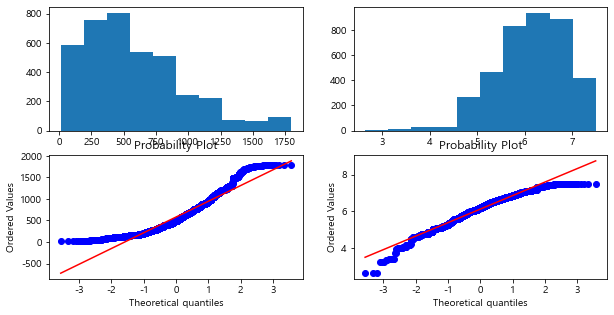

In [752]:
all_df['log_단지내주차면수'] = np.log1p(all_df['단지내주차면수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['단지내주차면수'])
ax[0][1].hist(all_df['log_단지내주차면수'])

stats.probplot(all_df['단지내주차면수'], plot=ax[1][0])
stats.probplot(all_df['log_단지내주차면수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([3.29583687, 3.29583687, 3.29583687, ..., 7.85282781, 7.85282781,
         7.85282781])),
 (0.6093767949475518, 6.611311889490474, 0.9883341683848889))

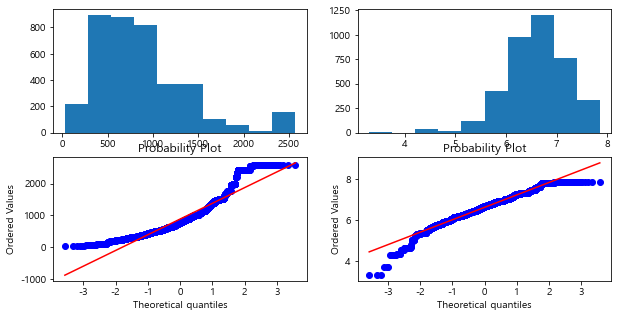

In [753]:
all_df['log_총세대수'] = np.log1p(all_df['총세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['총세대수'])
ax[0][1].hist(all_df['log_총세대수'])

stats.probplot(all_df['총세대수'], plot=ax[1][0])
stats.probplot(all_df['log_총세대수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([0.6931472, 0.6931472, 0.6931472, ..., 7.293698 , 7.3072023,
         7.5315523], dtype=float32)),
 (1.6307518283269595, 3.662091016769409, 0.9441208816516677))

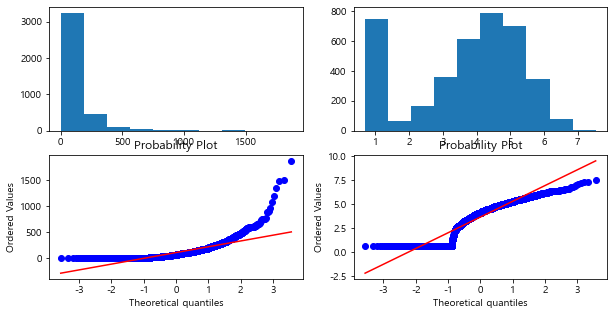

In [754]:
all_df['log_전용면적별세대수'] = np.log1p(all_df['전용면적별세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['전용면적별세대수'])
ax[0][1].hist(all_df['log_전용면적별세대수'])

stats.probplot(all_df['전용면적별세대수'], plot=ax[1][0])
stats.probplot(all_df['log_전용면적별세대수'], plot=ax[1][1])

(array([172., 260., 329., 272., 176., 579., 609., 774., 585., 121.]),
 array([0.        , 0.40253517, 0.80507034, 1.20760551, 1.61014068,
        2.01267585, 2.41521101, 2.81774618, 3.22028135, 3.62281652,
        4.02535169]),
 <a list of 10 Patch objects>)

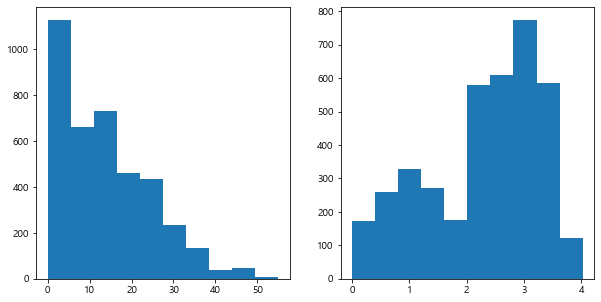

In [755]:
all_df['log_공가수'] = np.log1p(all_df['공가수'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(all_df['공가수'])
ax[1].hist(all_df['log_공가수'])

In [756]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,492,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,38.20,68.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,4.234107,3.178054
3873,C1229,453,38.20,8.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,2.197225,3.178054
3874,C1229,453,38.25,3.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.386294,3.178054
3875,C1229,453,38.28,4.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.609438,3.178054


In [757]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   단지코드          3877 non-null   category
 1   총세대수          3877 non-null   int64   
 2   임대건물구분        3877 non-null   object  
 3   지역            3877 non-null   object  
 4   공급유형          3877 non-null   object  
 5   전용면적          3877 non-null   float64 
 6   전용면적별세대수      3877 non-null   float32 
 7   공가수           3877 non-null   float64 
 8   자격유형          3877 non-null   int32   
 9   임대보증금         3877 non-null   int32   
 10  임대료           3877 non-null   int32   
 11  10분내지하철수      3877 non-null   float64 
 12  10분내버스정류장수    3877 non-null   float64 
 13  단지내주차면수       3877 non-null   float64 
 14  10대미만(여자)     3877 non-null   float64 
 15  10대미만(남자)     3877 non-null   float64 
 16  10대(여자)       3877 non-null   float64 
 17  10대(남자)       3877 non-null   float64 
 18  20대(여자) 

In [758]:
# '총세대수' : 0.333440, '단지내주차면수' : 0.861338, 임대건물구분_lbl : -0.449130
# 전용면적    0.112717, 전용면적별세대수   0.250513, 공가수           0.118910,
# 자격유형         -0.154034, 공급유형_lbl     -0.137277

In [759]:
train.corr()['등록차량수']

총세대수          0.326923
전용면적          0.106366
전용면적별세대수      0.254948
공가수           0.130775
10분내지하철수     -0.101792
10분내버스정류장수    0.110977
단지내주차면수       0.856549
등록차량수         1.000000
10대미만(여자)     0.268142
10대미만(남자)     0.274423
10대(여자)       0.017406
10대(남자)      -0.013654
20대(여자)       0.008058
20대(남자)      -0.138710
30대(여자)       0.384424
30대(남자)       0.369807
40대(여자)       0.186006
40대(남자)       0.320559
50대(여자)      -0.236608
50대(남자)      -0.266656
60대(여자)      -0.191946
60대(남자)      -0.243727
70대(여자)      -0.190950
70대(남자)      -0.147894
80대(여자)      -0.224072
80대(남자)      -0.151342
90대(여자)      -0.180396
90대(남자)      -0.054103
100대(여자)      0.134927
100대(남자)      0.006264
Name: 등록차량수, dtype: float64

(array([3.245e+03, 4.700e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <a list of 10 Patch objects>)

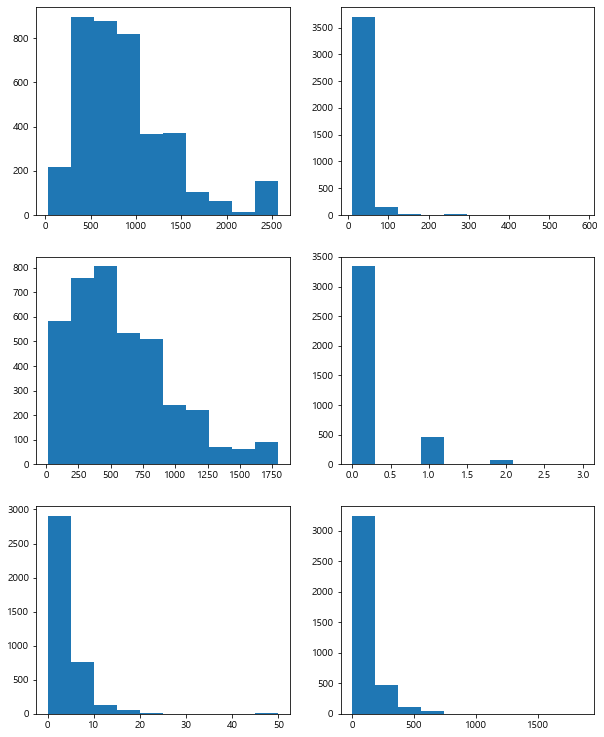

In [760]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

In [761]:
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,아파트,경상남도,국민임대,33.48,276.0,17.0,1,9216000,...,492,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372
1,C2515,545,아파트,경상남도,국민임대,39.60,60.0,17.0,1,12672000,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372
2,C2515,545,아파트,경상남도,국민임대,39.60,20.0,17.0,1,12672000,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372
3,C2515,545,아파트,경상남도,국민임대,46.90,38.0,17.0,1,18433000,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372
4,C2515,545,아파트,경상남도,국민임대,46.90,19.0,17.0,1,18433000,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,아파트,세종특별자치시,행복주택,38.20,68.0,23.0,10,30101000,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,4.234107,3.178054
3873,C1229,453,아파트,세종특별자치시,행복주택,38.20,8.0,23.0,10,30101000,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,2.197225,3.178054
3874,C1229,453,아파트,세종특별자치시,행복주택,38.25,3.0,23.0,10,30101000,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.386294,3.178054
3875,C1229,453,아파트,세종특별자치시,행복주택,38.28,4.0,23.0,10,30101000,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.609438,3.178054


# 원핫 인코딩

In [762]:
# print("dummy 수행 전 shape",all_df_last.shape)
# all_df_last_oh = pd.get_dummies(all_df_last)
# print("dummy 수행 후 shape",all_df_last_oh.shape)

In [763]:
# all_df = pd.get_dummies(data = all_df, columns = ['임대건물구분'], prefix = '임대건물구분')

In [764]:
# all_df = pd.get_dummies(data = all_df, columns = ['지역'], prefix = '지역')

In [765]:
# all_df = pd.get_dummies(data = all_df, columns = ['공급유형'], prefix = '공급유형')

In [766]:
# all_df = pd.get_dummies(data = all_df, columns = ['자격유형'], prefix = '자격유형')

In [767]:
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,아파트,경상남도,국민임대,33.48,276.0,17.0,1,9216000,...,492,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372
1,C2515,545,아파트,경상남도,국민임대,39.60,60.0,17.0,1,12672000,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372
2,C2515,545,아파트,경상남도,국민임대,39.60,20.0,17.0,1,12672000,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372
3,C2515,545,아파트,경상남도,국민임대,46.90,38.0,17.0,1,18433000,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372
4,C2515,545,아파트,경상남도,국민임대,46.90,19.0,17.0,1,18433000,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,아파트,세종특별자치시,행복주택,38.20,68.0,23.0,10,30101000,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,4.234107,3.178054
3873,C1229,453,아파트,세종특별자치시,행복주택,38.20,8.0,23.0,10,30101000,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,2.197225,3.178054
3874,C1229,453,아파트,세종특별자치시,행복주택,38.25,3.0,23.0,10,30101000,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.386294,3.178054
3875,C1229,453,아파트,세종특별자치시,행복주택,38.28,4.0,23.0,10,30101000,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.609438,3.178054


In [768]:
train_df = all_df_last.iloc[0:2869,:]
test_df = all_df_last.iloc[2869:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2086,1080,59.94,30.0,7.0,1,39000000,460000,0.0,2.0,...,3,3.0,39460100,0.945709,0.993519,7.041412,6.985642,3.433987,2.079442,1524.0
2865,C2086,1080,74.92,156.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,5.056246,2.079442,1524.0
2866,C2086,1080,74.93,78.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,4.369448,2.079442,1524.0
2867,C2086,1080,84.88,160.0,7.0,1,61000000,600000,0.0,2.0,...,3,3.0,61600100,0.945709,0.993519,7.041412,6.985642,5.081404,2.079442,1524.0


In [769]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [770]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수            0.326923
전용면적            0.106366
전용면적별세대수        0.254948
공가수             0.130775
자격유형           -0.145695
임대보증금           0.412956
임대료             0.530381
10분내지하철수       -0.079587
10분내버스정류장수      0.110977
단지내주차면수         0.856549
10대미만(여자)       0.268142
10대미만(남자)       0.274423
10대(여자)         0.017406
10대(남자)        -0.013654
20대(여자)         0.008058
20대(남자)        -0.138710
30대(여자)         0.384424
30대(남자)         0.369807
40대(여자)         0.186006
40대(남자)         0.320559
50대(여자)        -0.236608
50대(남자)        -0.266656
60대(여자)        -0.191946
60대(남자)        -0.243727
70대(여자)        -0.190950
70대(남자)        -0.147894
80대(여자)        -0.224072
80대(남자)        -0.151342
90대(여자)        -0.180396
90대(남자)        -0.054103
100대(여자)        0.134927
100대(남자)        0.006264
임대건물구분_lbl     -0.449235
지역_lbl          0.044321
공급유형_lbl       -0.158484
단지코드_lbl       -0.097279
qcut_총세대수       0.391915
단지코드_Type       0.106931
환산보증금           0.414723
주차면수대비총세대수비

In [771]:
pd.set_option('display.min_rows',10)

In [772]:
train_df.head(30)

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0,5.327876
5,C2515,545,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,4.672829,2.890372,205.0,5.327876
6,C2515,545,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,3.295837,2.890372,205.0,5.327876
7,C2576,405,46.90,313.0,19.0,1,19436000,161780,0.0,4.0,...,3.0,19597880,1.368243,0.953086,5.693732,6.006353,5.749393,2.995732,73.0,4.304065
8,C2576,405,59.88,92.0,19.0,1,28252000,235420,0.0,4.0,...,3.0,28487520,1.368243,0.953086,5.693732,6.006353,4.532599,2.995732,73.0,4.304065
9,C2416,560,26.34,360.0,0.0,3,3138000,69820,0.0,5.0,...,3.0,3207920,3.636364,1.000000,5.043425,6.329721,5.888878,0.000000,63.0,4.158883


In [773]:
train_df.shape

(2869, 48)

In [774]:
train_df.isnull().sum()

단지코드            0
총세대수            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
단지코드_Type       0
환산보증금           0
주차면수대비총세대수비율    0
거주율             0
log_단지내주차면수     0
log_총세대수        0
log_전용면적별세대수    0
log_공가수         0
등록차량수           0
log_등록차량수       0
dtype: int64

In [775]:
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,아파트,경상남도,국민임대,33.48,276.0,17.0,1,9216000,...,492,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372
1,C2515,545,아파트,경상남도,국민임대,39.60,60.0,17.0,1,12672000,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372
2,C2515,545,아파트,경상남도,국민임대,39.60,20.0,17.0,1,12672000,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372
3,C2515,545,아파트,경상남도,국민임대,46.90,38.0,17.0,1,18433000,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372
4,C2515,545,아파트,경상남도,국민임대,46.90,19.0,17.0,1,18433000,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,아파트,세종특별자치시,행복주택,38.20,68.0,23.0,10,30101000,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,4.234107,3.178054
3873,C1229,453,아파트,세종특별자치시,행복주택,38.20,8.0,23.0,10,30101000,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,2.197225,3.178054
3874,C1229,453,아파트,세종특별자치시,행복주택,38.25,3.0,23.0,10,30101000,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.386294,3.178054
3875,C1229,453,아파트,세종특별자치시,행복주택,38.28,4.0,23.0,10,30101000,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.609438,3.178054


In [776]:
train_df.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', '주차면수대비총세대수비율', '거주율', 'log_단지내주차면수',
       'log_총세대수', 'log_전용면적별세대수', 'log_공가수', '등록차량수', 'log_등록차량수'],
      dtype='object')

In [815]:
# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
#        'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
#        '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
#        '단지코드_Type']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#        '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
#        '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
#        '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
#        '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
# lable_name = 'log_등록차량수'
sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '거주율', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']

# '총세대수', '공가수', '임대료', '임대건물구분_lbl', '지역_lbl', '주차면수대비총세대수비율', 'log_단지내주차면수',
#         'log_공가수'
 
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# Feature 중요도 뽑기

## 순방향 선택 방법
- 하나의 예측 변수로 시작하여 더 반복적으로 추가합니다. 각 후속 반복에서 성능 기준에 따라 나머지 원래 예측 변수 중 가장 좋은 것이 추가됩니다.

In [789]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=14,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(X, y)

#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(9,)",[0.6430981028552802],0.643098,"(단지내주차면수,)"
2,"(9, 32)",[0.7296502558565444],0.72965,"(단지내주차면수, 임대건물구분_lbl)"
3,"(9, 32, 40)",[0.7526811097756674],0.752681,"(단지내주차면수, 임대건물구분_lbl, 거주율)"
4,"(9, 32, 39, 40)",[0.7677044903888961],0.767704,"(단지내주차면수, 임대건물구분_lbl, 주차면수대비총세대수비율, 거주율)"
5,"(9, 32, 33, 39, 40)",[0.7796403290829406],0.77964,"(단지내주차면수, 임대건물구분_lbl, 지역_lbl, 주차면수대비총세대수비율, 거주율)"
6,"(6, 9, 32, 33, 39, 40)",[0.7874582153276072],0.787458,"(임대료, 단지내주차면수, 임대건물구분_lbl, 지역_lbl, 주차면수대비총세대수비..."
7,"(6, 9, 32, 33, 34, 39, 40)",[0.7917222495908798],0.791722,"(임대료, 단지내주차면수, 임대건물구분_lbl, 지역_lbl, 공급유형_lbl, 주..."
8,"(6, 9, 32, 33, 34, 36, 39, 40)",[0.7964974041965527],0.796497,"(임대료, 단지내주차면수, 임대건물구분_lbl, 지역_lbl, 공급유형_lbl, q..."
9,"(3, 6, 9, 32, 33, 34, 36, 39, 40)",[0.7986059483931915],0.798606,"(공가수, 임대료, 단지내주차면수, 임대건물구분_lbl, 지역_lbl, 공급유형_l..."
10,"(3, 5, 6, 9, 32, 33, 34, 36, 39, 40)",[0.8000460209519832],0.800046,"(공가수, 임대보증금, 임대료, 단지내주차면수, 임대건물구분_lbl, 지역_lbl,..."


In [790]:
df_SFS_results.loc[14,'feature_names']

('공가수',
 '임대보증금',
 '임대료',
 '10분내지하철수',
 '10분내버스정류장수',
 '단지내주차면수',
 '50대(여자)',
 '100대(남자)',
 '임대건물구분_lbl',
 '지역_lbl',
 '공급유형_lbl',
 'qcut_총세대수',
 '주차면수대비총세대수비율',
 '거주율')

In [682]:
df_SFFS_results2.loc[16,'feature_names']

('총세대수',
 '공가수',
 '임대료',
 '10분내지하철수',
 '10분내버스정류장수',
 '단지내주차면수',
 '30대(여자)',
 '40대(남자)',
 '100대(남자)',
 '임대건물구분_lbl',
 '지역_lbl',
 '단지코드_Type',
 '주차면수대비총세대수비율',
 'log_단지내주차면수',
 'log_총세대수',
 'log_공가수')

## 단계적 선택
- 정방향 선택과 역방향 제거의 조합을 기반으로 하는 양방향. 제거된 모델에 예측 변수를 다시 추가하는 것을 재고하기 때문에 이전 두 절차보다 덜 탐욕스러운 것으로 간주됩니다(반대의 경우도 마찬가지). 그럼에도 불구하고 주어진 반복에서 로컬 최적화를 기반으로 고려가 이루어집니다.

In [679]:
#Define Sequential Forward Selection (sfs)
sffs = SFS(LinearRegression(),
           k_features=16,
           forward=True,
           floating=True,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
feature_names=sel
sffs.fit(X, y, custom_feature_names=feature_names)

#Create a dataframe for the SFS results 
df_SFFS_results2 = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results2

,feature_idx,cv_scores,avg_score,feature_names
1,"(41,)",[0.7698604572968635],0.76986,"(log_단지내주차면수,)"
2,"(0, 41)",[0.8131095709590975],0.81311,"(총세대수, log_단지내주차면수)"
3,"(0, 6, 41)",[0.8249525100826771],0.824953,"(총세대수, 임대료, log_단지내주차면수)"
4,"(0, 3, 6, 41)",[0.828838219005085],0.828838,"(총세대수, 공가수, 임대료, log_단지내주차면수)"
5,"(0, 3, 6, 41, 44)",[0.8342843250663394],0.834284,"(총세대수, 공가수, 임대료, log_단지내주차면수, log_공가수)"
6,"(0, 3, 6, 33, 41, 44)",[0.8390899874398635],0.83909,"(총세대수, 공가수, 임대료, 지역_lbl, log_단지내주차면수, log_공가수)"
7,"(0, 3, 6, 32, 33, 41, 44)",[0.8430925885324062],0.843093,"(총세대수, 공가수, 임대료, 임대건물구분_lbl, 지역_lbl, log_단지내주차..."
8,"(0, 3, 6, 32, 33, 39, 41, 44)",[0.8468638546528854],0.846864,"(총세대수, 공가수, 임대료, 임대건물구분_lbl, 지역_lbl, 주차면수대비총세대..."
9,"(0, 3, 6, 7, 32, 33, 39, 41, 44)",[0.850484014054494],0.850484,"(총세대수, 공가수, 임대료, 10분내지하철수, 임대건물구분_lbl, 지역_lbl,..."
10,"(0, 3, 6, 7, 8, 32, 33, 39, 41, 44)",[0.8526740384165014],0.852674,"(총세대수, 공가수, 임대료, 10분내지하철수, 10분내버스정류장수, 임대건물구분_..."


In [681]:
df_SFFS_results2.loc[16,'feature_names']

('총세대수',
 '공가수',
 '임대료',
 '10분내지하철수',
 '10분내버스정류장수',
 '단지내주차면수',
 '30대(여자)',
 '40대(남자)',
 '100대(남자)',
 '임대건물구분_lbl',
 '지역_lbl',
 '단지코드_Type',
 '주차면수대비총세대수비율',
 'log_단지내주차면수',
 'log_총세대수',
 'log_공가수')

## 역방향 제거
- 모든 예측 변수로 시작하여 하나씩 반복적으로 제거합니다. 가장 인기 있는 알고리즘 중 하나는 기능 중요도 순위를 기반으로 덜 중요한 예측 변수를 제거하는 RFE(재귀적 기능 제거)입니다.

In [649]:
#Build a logistic regression model 
model = LinearRegression()
#Define RFE 
rfe = RFE(model, 5)
#Use RFE to select the top 5 features 
fit = rfe.fit(X, y)

#Create a dataframe for the results 
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': sel[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results

,Feature_names,Selected,RFE_ranking
Columns,,,
0,총세대수,False,40
1,전용면적,False,34
2,전용면적별세대수,False,35
3,공가수,False,28
4,자격유형,False,32
5,임대보증금,False,38
6,임대료,False,37
7,10분내지하철수,False,25
8,10분내버스정류장수,False,31


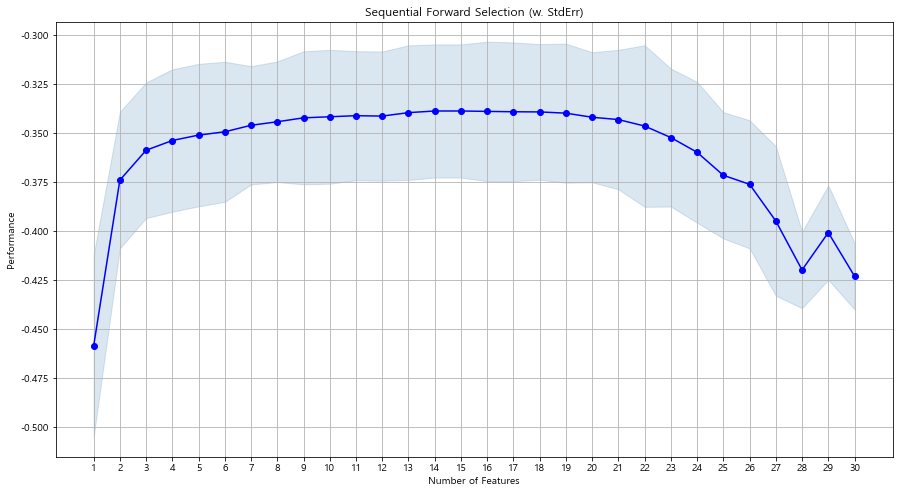

In [788]:
sfs = SFS(LinearRegression(), 
          k_features=30, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_absolute_error',
          cv=5)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(15,8))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

# 회귀 트리 모델 학습/예측/평가

In [809]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [779]:
# # 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
# def get_top_features(model):
#     ftr_importances_values = model.feature_importances_
#     ftr_importances = pd.Series(ftr_importances_values, index=X.columns  )
#     ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
#     return ftr_top20

# def visualize_ftr_importances(models):
#     # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
#     fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
#     fig.tight_layout() 
#     # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
#     for i_num, model in enumerate(models):
#         # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
#         ftr_top20 = get_top_features(model)
#         axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
#         #font 크기 조정.
#         for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
#             label.set_fontsize(22)
#         sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# # 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
# models = [best_xgb, best_lgbm, best_catm, best_catm]
# visualize_ftr_importances(models)

In [780]:
train_df.corr()

,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
총세대수,1.000000,0.037488,0.099209,0.069985,0.177197,-0.123533,-0.150798,0.210480,-0.001086,0.520272,...,0.093677,-0.124009,0.332188,0.415700,0.463229,0.916545,-0.188157,-0.064877,0.326923,0.222139
전용면적,0.037488,1.000000,-0.033365,-0.079302,-0.165597,0.138924,0.198732,-0.007498,-0.004398,0.060190,...,0.063976,0.139653,-0.030012,0.079890,0.087413,0.043317,-0.017055,-0.075129,0.106366,0.106791
전용면적별세대수,0.099209,-0.033365,1.000000,0.162760,-0.075290,0.107011,0.166833,-0.048144,0.045899,0.288788,...,-0.013200,0.107664,-0.200548,0.027877,0.292328,0.140879,0.717544,0.140386,0.254948,0.277025
공가수,0.069985,-0.079302,0.162760,1.000000,0.209489,0.184146,0.017830,-0.078113,0.043096,0.303954,...,-0.168454,0.183478,-0.222160,-0.555724,0.308162,0.134270,0.248208,0.900014,0.130775,0.209018
자격유형,0.177197,-0.165597,-0.075290,0.209489,1.000000,0.005152,-0.247357,0.003009,-0.033827,-0.053812,...,-0.349167,0.003484,0.192325,-0.232917,-0.159370,0.069560,-0.190342,0.081812,-0.145695,-0.233354
임대보증금,-0.123533,0.138924,0.107011,0.184146,0.005152,1.000000,0.639816,-0.037727,0.107931,0.361976,...,-0.107924,0.999987,-0.495835,-0.171976,0.376542,-0.092900,0.373972,0.215701,0.412956,0.457816
임대료,-0.150798,0.198732,0.166833,0.017830,-0.247357,0.639816,1.000000,-0.019671,0.044754,0.409510,...,-0.019197,0.643739,-0.542048,-0.022626,0.442327,-0.089316,0.440770,0.102481,0.530381,0.558854
10분내지하철수,0.210480,-0.007498,-0.048144,-0.078113,0.003009,-0.037727,-0.019671,1.000000,0.087458,-0.028139,...,0.041420,-0.037697,0.162240,0.098014,0.005856,0.175886,-0.140109,-0.071107,-0.079587,-0.084091
10분내버스정류장수,-0.001086,-0.004398,0.045899,0.043096,-0.033827,0.107931,0.044754,0.087458,1.000000,0.078828,...,-0.003224,0.107768,-0.026784,0.038116,0.055282,0.048325,0.050224,0.053605,0.110977,0.084163
단지내주차면수,0.520272,0.060190,0.288788,0.303954,-0.053812,0.361976,0.409510,-0.028139,0.078828,1.000000,...,0.060451,0.363155,-0.492644,0.179930,0.913477,0.571586,0.427089,0.292094,0.856549,0.801934


In [816]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error
def get_mae_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mae = mean_absolute_error(y_test , pred_value)
        print('{0} 모델의 MAE: {1}'.format(key, mae))

xgb_reg = XGBRegressor(n_estimators=10000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=10000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
catm_reg = CatBoostRegressor(n_estimators=10000, learning_rate=0.05 ,random_state= 0,verbose= 1,objective = "MAE")

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
catm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)
catm_pred = catm_reg.predict(X_test)


pred = 0.3 * xgb_pred + 0.3 * lgbm_pred + 0.4 * catm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred,
          'CATM' : catm_pred}
  
get_mae_pred(preds)

0:	learn: 0.6797137	total: 3.09ms	remaining: 30.9s
1:	learn: 0.6533948	total: 5.96ms	remaining: 29.8s
2:	learn: 0.6280959	total: 8.97ms	remaining: 29.9s
3:	learn: 0.6036756	total: 15.1ms	remaining: 37.8s
4:	learn: 0.5835461	total: 19.5ms	remaining: 39.1s
5:	learn: 0.5620944	total: 26.7ms	remaining: 44.5s
6:	learn: 0.5417801	total: 30.2ms	remaining: 43.1s
7:	learn: 0.5257117	total: 33.9ms	remaining: 42.4s
8:	learn: 0.5092383	total: 37.7ms	remaining: 41.9s
9:	learn: 0.4925458	total: 41.1ms	remaining: 41s
10:	learn: 0.4747875	total: 43.8ms	remaining: 39.8s
11:	learn: 0.4585097	total: 46.8ms	remaining: 39s
12:	learn: 0.4444056	total: 50.9ms	remaining: 39.1s
13:	learn: 0.4298460	total: 53.8ms	remaining: 38.4s
14:	learn: 0.4170902	total: 56.7ms	remaining: 37.7s
15:	learn: 0.4046212	total: 59.6ms	remaining: 37.2s
16:	learn: 0.3924510	total: 62.7ms	remaining: 36.8s
17:	learn: 0.3793990	total: 66.2ms	remaining: 36.7s
18:	learn: 0.3688331	total: 69.4ms	remaining: 36.5s
19:	learn: 0.3575494	total

187:	learn: 0.1136661	total: 832ms	remaining: 43.4s
188:	learn: 0.1132522	total: 841ms	remaining: 43.6s
189:	learn: 0.1128830	total: 848ms	remaining: 43.8s
190:	learn: 0.1126200	total: 853ms	remaining: 43.8s
191:	learn: 0.1122026	total: 856ms	remaining: 43.7s
192:	learn: 0.1121021	total: 859ms	remaining: 43.6s
193:	learn: 0.1118667	total: 862ms	remaining: 43.6s
194:	learn: 0.1114465	total: 865ms	remaining: 43.5s
195:	learn: 0.1112263	total: 868ms	remaining: 43.4s
196:	learn: 0.1109165	total: 871ms	remaining: 43.4s
197:	learn: 0.1105269	total: 875ms	remaining: 43.3s
198:	learn: 0.1102865	total: 877ms	remaining: 43.2s
199:	learn: 0.1102275	total: 882ms	remaining: 43.2s
200:	learn: 0.1101776	total: 885ms	remaining: 43.1s
201:	learn: 0.1101137	total: 888ms	remaining: 43.1s
202:	learn: 0.1100594	total: 891ms	remaining: 43s
203:	learn: 0.1097505	total: 895ms	remaining: 43s
204:	learn: 0.1095605	total: 898ms	remaining: 42.9s
205:	learn: 0.1094043	total: 901ms	remaining: 42.8s
206:	learn: 0.10

380:	learn: 0.0827413	total: 1.49s	remaining: 37.5s
381:	learn: 0.0826449	total: 1.49s	remaining: 37.5s
382:	learn: 0.0825759	total: 1.49s	remaining: 37.5s
383:	learn: 0.0825557	total: 1.5s	remaining: 37.5s
384:	learn: 0.0824168	total: 1.5s	remaining: 37.5s
385:	learn: 0.0819635	total: 1.5s	remaining: 37.4s
386:	learn: 0.0818717	total: 1.51s	remaining: 37.4s
387:	learn: 0.0817882	total: 1.51s	remaining: 37.4s
388:	learn: 0.0817027	total: 1.51s	remaining: 37.4s
389:	learn: 0.0815972	total: 1.51s	remaining: 37.4s
390:	learn: 0.0814049	total: 1.52s	remaining: 37.3s
391:	learn: 0.0811847	total: 1.52s	remaining: 37.3s
392:	learn: 0.0810307	total: 1.53s	remaining: 37.3s
393:	learn: 0.0808737	total: 1.53s	remaining: 37.3s
394:	learn: 0.0807591	total: 1.53s	remaining: 37.3s
395:	learn: 0.0806720	total: 1.53s	remaining: 37.3s
396:	learn: 0.0806229	total: 1.54s	remaining: 37.2s
397:	learn: 0.0805532	total: 1.54s	remaining: 37.2s
398:	learn: 0.0805404	total: 1.54s	remaining: 37.2s
399:	learn: 0.0

563:	learn: 0.0653700	total: 2.14s	remaining: 35.8s
564:	learn: 0.0652985	total: 2.14s	remaining: 35.8s
565:	learn: 0.0652780	total: 2.15s	remaining: 35.8s
566:	learn: 0.0651910	total: 2.15s	remaining: 35.8s
567:	learn: 0.0650656	total: 2.16s	remaining: 35.8s
568:	learn: 0.0650122	total: 2.16s	remaining: 35.9s
569:	learn: 0.0649649	total: 2.17s	remaining: 35.8s
570:	learn: 0.0649427	total: 2.17s	remaining: 35.8s
571:	learn: 0.0648194	total: 2.17s	remaining: 35.8s
572:	learn: 0.0647391	total: 2.18s	remaining: 35.8s
573:	learn: 0.0647155	total: 2.18s	remaining: 35.8s
574:	learn: 0.0646817	total: 2.18s	remaining: 35.8s
575:	learn: 0.0646416	total: 2.19s	remaining: 35.8s
576:	learn: 0.0645908	total: 2.19s	remaining: 35.8s
577:	learn: 0.0645823	total: 2.2s	remaining: 35.8s
578:	learn: 0.0645679	total: 2.2s	remaining: 35.8s
579:	learn: 0.0645599	total: 2.21s	remaining: 35.8s
580:	learn: 0.0645216	total: 2.21s	remaining: 35.8s
581:	learn: 0.0644497	total: 2.21s	remaining: 35.8s
582:	learn: 0.

742:	learn: 0.0555286	total: 2.79s	remaining: 34.8s
743:	learn: 0.0553366	total: 2.79s	remaining: 34.8s
744:	learn: 0.0552948	total: 2.8s	remaining: 34.8s
745:	learn: 0.0552513	total: 2.8s	remaining: 34.8s
746:	learn: 0.0552322	total: 2.81s	remaining: 34.8s
747:	learn: 0.0552091	total: 2.81s	remaining: 34.7s
748:	learn: 0.0551580	total: 2.81s	remaining: 34.7s
749:	learn: 0.0551111	total: 2.82s	remaining: 34.7s
750:	learn: 0.0550788	total: 2.82s	remaining: 34.7s
751:	learn: 0.0550141	total: 2.82s	remaining: 34.7s
752:	learn: 0.0549667	total: 2.82s	remaining: 34.7s
753:	learn: 0.0548642	total: 2.83s	remaining: 34.7s
754:	learn: 0.0548205	total: 2.83s	remaining: 34.7s
755:	learn: 0.0547357	total: 2.83s	remaining: 34.7s
756:	learn: 0.0547232	total: 2.84s	remaining: 34.7s
757:	learn: 0.0546343	total: 2.84s	remaining: 34.6s
758:	learn: 0.0545724	total: 2.84s	remaining: 34.6s
759:	learn: 0.0545563	total: 2.85s	remaining: 34.6s
760:	learn: 0.0545282	total: 2.85s	remaining: 34.6s
761:	learn: 0.

933:	learn: 0.0489932	total: 3.44s	remaining: 33.4s
934:	learn: 0.0489847	total: 3.45s	remaining: 33.4s
935:	learn: 0.0489264	total: 3.45s	remaining: 33.4s
936:	learn: 0.0488921	total: 3.45s	remaining: 33.4s
937:	learn: 0.0488747	total: 3.46s	remaining: 33.4s
938:	learn: 0.0488126	total: 3.46s	remaining: 33.4s
939:	learn: 0.0486892	total: 3.47s	remaining: 33.4s
940:	learn: 0.0486785	total: 3.47s	remaining: 33.4s
941:	learn: 0.0486744	total: 3.47s	remaining: 33.4s
942:	learn: 0.0486401	total: 3.48s	remaining: 33.4s
943:	learn: 0.0486035	total: 3.48s	remaining: 33.4s
944:	learn: 0.0485955	total: 3.48s	remaining: 33.4s
945:	learn: 0.0485499	total: 3.49s	remaining: 33.4s
946:	learn: 0.0484959	total: 3.49s	remaining: 33.4s
947:	learn: 0.0484893	total: 3.49s	remaining: 33.4s
948:	learn: 0.0484822	total: 3.5s	remaining: 33.4s
949:	learn: 0.0484646	total: 3.5s	remaining: 33.3s
950:	learn: 0.0484600	total: 3.5s	remaining: 33.3s
951:	learn: 0.0484538	total: 3.51s	remaining: 33.4s
952:	learn: 0.0

1117:	learn: 0.0434753	total: 4.1s	remaining: 32.5s
1118:	learn: 0.0434420	total: 4.1s	remaining: 32.5s
1119:	learn: 0.0434212	total: 4.1s	remaining: 32.5s
1120:	learn: 0.0434119	total: 4.11s	remaining: 32.5s
1121:	learn: 0.0434086	total: 4.11s	remaining: 32.5s
1122:	learn: 0.0433914	total: 4.12s	remaining: 32.5s
1123:	learn: 0.0432997	total: 4.12s	remaining: 32.5s
1124:	learn: 0.0432929	total: 4.12s	remaining: 32.5s
1125:	learn: 0.0432794	total: 4.13s	remaining: 32.5s
1126:	learn: 0.0432707	total: 4.13s	remaining: 32.5s
1127:	learn: 0.0432528	total: 4.13s	remaining: 32.5s
1128:	learn: 0.0432489	total: 4.14s	remaining: 32.5s
1129:	learn: 0.0432391	total: 4.14s	remaining: 32.5s
1130:	learn: 0.0432374	total: 4.14s	remaining: 32.5s
1131:	learn: 0.0432149	total: 4.15s	remaining: 32.5s
1132:	learn: 0.0432011	total: 4.15s	remaining: 32.5s
1133:	learn: 0.0431808	total: 4.15s	remaining: 32.5s
1134:	learn: 0.0431705	total: 4.16s	remaining: 32.5s
1135:	learn: 0.0431662	total: 4.16s	remaining: 32

1301:	learn: 0.0401136	total: 4.75s	remaining: 31.7s
1302:	learn: 0.0400683	total: 4.75s	remaining: 31.7s
1303:	learn: 0.0400541	total: 4.76s	remaining: 31.7s
1304:	learn: 0.0400290	total: 4.76s	remaining: 31.7s
1305:	learn: 0.0399170	total: 4.77s	remaining: 31.7s
1306:	learn: 0.0399141	total: 4.77s	remaining: 31.7s
1307:	learn: 0.0399050	total: 4.77s	remaining: 31.7s
1308:	learn: 0.0398999	total: 4.78s	remaining: 31.7s
1309:	learn: 0.0398986	total: 4.78s	remaining: 31.7s
1310:	learn: 0.0398955	total: 4.78s	remaining: 31.7s
1311:	learn: 0.0398485	total: 4.78s	remaining: 31.7s
1312:	learn: 0.0398436	total: 4.79s	remaining: 31.7s
1313:	learn: 0.0398413	total: 4.79s	remaining: 31.7s
1314:	learn: 0.0398316	total: 4.79s	remaining: 31.7s
1315:	learn: 0.0398286	total: 4.8s	remaining: 31.7s
1316:	learn: 0.0397771	total: 4.8s	remaining: 31.6s
1317:	learn: 0.0397705	total: 4.8s	remaining: 31.6s
1318:	learn: 0.0397653	total: 4.81s	remaining: 31.6s
1319:	learn: 0.0397619	total: 4.81s	remaining: 31

1491:	learn: 0.0368392	total: 5.4s	remaining: 30.8s
1492:	learn: 0.0368381	total: 5.41s	remaining: 30.8s
1493:	learn: 0.0368334	total: 5.41s	remaining: 30.8s
1494:	learn: 0.0368301	total: 5.42s	remaining: 30.8s
1495:	learn: 0.0368288	total: 5.42s	remaining: 30.8s
1496:	learn: 0.0368272	total: 5.42s	remaining: 30.8s
1497:	learn: 0.0368211	total: 5.43s	remaining: 30.8s
1498:	learn: 0.0368153	total: 5.43s	remaining: 30.8s
1499:	learn: 0.0368126	total: 5.43s	remaining: 30.8s
1500:	learn: 0.0368112	total: 5.44s	remaining: 30.8s
1501:	learn: 0.0368056	total: 5.45s	remaining: 30.8s
1502:	learn: 0.0367981	total: 5.45s	remaining: 30.8s
1503:	learn: 0.0367950	total: 5.46s	remaining: 30.8s
1504:	learn: 0.0367631	total: 5.46s	remaining: 30.8s
1505:	learn: 0.0367618	total: 5.46s	remaining: 30.8s
1506:	learn: 0.0367572	total: 5.46s	remaining: 30.8s
1507:	learn: 0.0367502	total: 5.47s	remaining: 30.8s
1508:	learn: 0.0366855	total: 5.47s	remaining: 30.8s
1509:	learn: 0.0366704	total: 5.47s	remaining: 

1662:	learn: 0.0346581	total: 6.06s	remaining: 30.4s
1663:	learn: 0.0346539	total: 6.06s	remaining: 30.4s
1664:	learn: 0.0346245	total: 6.07s	remaining: 30.4s
1665:	learn: 0.0346208	total: 6.07s	remaining: 30.4s
1666:	learn: 0.0346169	total: 6.08s	remaining: 30.4s
1667:	learn: 0.0345980	total: 6.08s	remaining: 30.4s
1668:	learn: 0.0345914	total: 6.08s	remaining: 30.4s
1669:	learn: 0.0345765	total: 6.09s	remaining: 30.4s
1670:	learn: 0.0345335	total: 6.09s	remaining: 30.4s
1671:	learn: 0.0344792	total: 6.1s	remaining: 30.4s
1672:	learn: 0.0344641	total: 6.1s	remaining: 30.4s
1673:	learn: 0.0344597	total: 6.1s	remaining: 30.4s
1674:	learn: 0.0344571	total: 6.11s	remaining: 30.4s
1675:	learn: 0.0344110	total: 6.11s	remaining: 30.3s
1676:	learn: 0.0343678	total: 6.12s	remaining: 30.3s
1677:	learn: 0.0343498	total: 6.12s	remaining: 30.3s
1678:	learn: 0.0343311	total: 6.12s	remaining: 30.3s
1679:	learn: 0.0343256	total: 6.13s	remaining: 30.3s
1680:	learn: 0.0342776	total: 6.13s	remaining: 30

1846:	learn: 0.0326782	total: 6.71s	remaining: 29.6s
1847:	learn: 0.0326664	total: 6.71s	remaining: 29.6s
1848:	learn: 0.0326619	total: 6.72s	remaining: 29.6s
1849:	learn: 0.0326596	total: 6.72s	remaining: 29.6s
1850:	learn: 0.0326581	total: 6.73s	remaining: 29.6s
1851:	learn: 0.0326543	total: 6.73s	remaining: 29.6s
1852:	learn: 0.0326518	total: 6.74s	remaining: 29.6s
1853:	learn: 0.0326496	total: 6.74s	remaining: 29.6s
1854:	learn: 0.0326491	total: 6.75s	remaining: 29.6s
1855:	learn: 0.0326486	total: 6.75s	remaining: 29.6s
1856:	learn: 0.0325274	total: 6.75s	remaining: 29.6s
1857:	learn: 0.0325248	total: 6.76s	remaining: 29.6s
1858:	learn: 0.0325197	total: 6.76s	remaining: 29.6s
1859:	learn: 0.0325076	total: 6.76s	remaining: 29.6s
1860:	learn: 0.0325072	total: 6.77s	remaining: 29.6s
1861:	learn: 0.0325035	total: 6.77s	remaining: 29.6s
1862:	learn: 0.0325014	total: 6.77s	remaining: 29.6s
1863:	learn: 0.0324373	total: 6.78s	remaining: 29.6s
1864:	learn: 0.0324319	total: 6.78s	remaining:

2031:	learn: 0.0309648	total: 7.37s	remaining: 28.9s
2032:	learn: 0.0309643	total: 7.37s	remaining: 28.9s
2033:	learn: 0.0309633	total: 7.38s	remaining: 28.9s
2034:	learn: 0.0309515	total: 7.38s	remaining: 28.9s
2035:	learn: 0.0309481	total: 7.38s	remaining: 28.9s
2036:	learn: 0.0309410	total: 7.39s	remaining: 28.9s
2037:	learn: 0.0309401	total: 7.4s	remaining: 28.9s
2038:	learn: 0.0309296	total: 7.4s	remaining: 28.9s
2039:	learn: 0.0309159	total: 7.41s	remaining: 28.9s
2040:	learn: 0.0308798	total: 7.42s	remaining: 28.9s
2041:	learn: 0.0308671	total: 7.42s	remaining: 28.9s
2042:	learn: 0.0308665	total: 7.42s	remaining: 28.9s
2043:	learn: 0.0308504	total: 7.43s	remaining: 28.9s
2044:	learn: 0.0308471	total: 7.43s	remaining: 28.9s
2045:	learn: 0.0308404	total: 7.44s	remaining: 28.9s
2046:	learn: 0.0308402	total: 7.44s	remaining: 28.9s
2047:	learn: 0.0308200	total: 7.44s	remaining: 28.9s
2048:	learn: 0.0308166	total: 7.45s	remaining: 28.9s
2049:	learn: 0.0308155	total: 7.45s	remaining: 2

2212:	learn: 0.0294341	total: 8.01s	remaining: 28.2s
2213:	learn: 0.0294339	total: 8.01s	remaining: 28.2s
2214:	learn: 0.0294100	total: 8.02s	remaining: 28.2s
2215:	learn: 0.0294093	total: 8.02s	remaining: 28.2s
2216:	learn: 0.0293990	total: 8.03s	remaining: 28.2s
2217:	learn: 0.0293972	total: 8.03s	remaining: 28.2s
2218:	learn: 0.0293901	total: 8.03s	remaining: 28.2s
2219:	learn: 0.0293820	total: 8.04s	remaining: 28.2s
2220:	learn: 0.0293762	total: 8.04s	remaining: 28.2s
2221:	learn: 0.0293699	total: 8.04s	remaining: 28.2s
2222:	learn: 0.0293640	total: 8.05s	remaining: 28.2s
2223:	learn: 0.0293574	total: 8.05s	remaining: 28.2s
2224:	learn: 0.0293438	total: 8.06s	remaining: 28.2s
2225:	learn: 0.0293399	total: 8.06s	remaining: 28.2s
2226:	learn: 0.0293358	total: 8.06s	remaining: 28.1s
2227:	learn: 0.0293182	total: 8.07s	remaining: 28.1s
2228:	learn: 0.0292995	total: 8.07s	remaining: 28.1s
2229:	learn: 0.0292888	total: 8.07s	remaining: 28.1s
2230:	learn: 0.0292523	total: 8.08s	remaining:

2405:	learn: 0.0279186	total: 8.66s	remaining: 27.3s
2406:	learn: 0.0279169	total: 8.67s	remaining: 27.3s
2407:	learn: 0.0279146	total: 8.67s	remaining: 27.3s
2408:	learn: 0.0279105	total: 8.68s	remaining: 27.3s
2409:	learn: 0.0279077	total: 8.68s	remaining: 27.3s
2410:	learn: 0.0279064	total: 8.68s	remaining: 27.3s
2411:	learn: 0.0279057	total: 8.69s	remaining: 27.3s
2412:	learn: 0.0279050	total: 8.69s	remaining: 27.3s
2413:	learn: 0.0279034	total: 8.69s	remaining: 27.3s
2414:	learn: 0.0279007	total: 8.7s	remaining: 27.3s
2415:	learn: 0.0279001	total: 8.7s	remaining: 27.3s
2416:	learn: 0.0278964	total: 8.71s	remaining: 27.3s
2417:	learn: 0.0278922	total: 8.71s	remaining: 27.3s
2418:	learn: 0.0278888	total: 8.71s	remaining: 27.3s
2419:	learn: 0.0278751	total: 8.72s	remaining: 27.3s
2420:	learn: 0.0278741	total: 8.72s	remaining: 27.3s
2421:	learn: 0.0278607	total: 8.72s	remaining: 27.3s
2422:	learn: 0.0278597	total: 8.73s	remaining: 27.3s
2423:	learn: 0.0278508	total: 8.73s	remaining: 2

2584:	learn: 0.0265974	total: 9.31s	remaining: 26.7s
2585:	learn: 0.0265876	total: 9.32s	remaining: 26.7s
2586:	learn: 0.0265843	total: 9.32s	remaining: 26.7s
2587:	learn: 0.0265830	total: 9.32s	remaining: 26.7s
2588:	learn: 0.0265827	total: 9.33s	remaining: 26.7s
2589:	learn: 0.0265808	total: 9.33s	remaining: 26.7s
2590:	learn: 0.0265788	total: 9.34s	remaining: 26.7s
2591:	learn: 0.0265773	total: 9.34s	remaining: 26.7s
2592:	learn: 0.0265768	total: 9.34s	remaining: 26.7s
2593:	learn: 0.0265737	total: 9.35s	remaining: 26.7s
2594:	learn: 0.0265735	total: 9.35s	remaining: 26.7s
2595:	learn: 0.0265724	total: 9.35s	remaining: 26.7s
2596:	learn: 0.0265722	total: 9.36s	remaining: 26.7s
2597:	learn: 0.0265674	total: 9.36s	remaining: 26.7s
2598:	learn: 0.0265672	total: 9.36s	remaining: 26.7s
2599:	learn: 0.0265567	total: 9.37s	remaining: 26.7s
2600:	learn: 0.0265549	total: 9.37s	remaining: 26.7s
2601:	learn: 0.0265382	total: 9.38s	remaining: 26.7s
2602:	learn: 0.0265372	total: 9.38s	remaining:

2769:	learn: 0.0255032	total: 9.97s	remaining: 26s
2770:	learn: 0.0255030	total: 9.97s	remaining: 26s
2771:	learn: 0.0255009	total: 9.98s	remaining: 26s
2772:	learn: 0.0255004	total: 9.98s	remaining: 26s
2773:	learn: 0.0254994	total: 9.98s	remaining: 26s
2774:	learn: 0.0254972	total: 9.99s	remaining: 26s
2775:	learn: 0.0254964	total: 9.99s	remaining: 26s
2776:	learn: 0.0254952	total: 9.99s	remaining: 26s
2777:	learn: 0.0254944	total: 9.99s	remaining: 26s
2778:	learn: 0.0254938	total: 10s	remaining: 26s
2779:	learn: 0.0254933	total: 10s	remaining: 26s
2780:	learn: 0.0254931	total: 10s	remaining: 26s
2781:	learn: 0.0254927	total: 10s	remaining: 26s
2782:	learn: 0.0254911	total: 10s	remaining: 26s
2783:	learn: 0.0254898	total: 10s	remaining: 26s
2784:	learn: 0.0254886	total: 10s	remaining: 26s
2785:	learn: 0.0254877	total: 10s	remaining: 25.9s
2786:	learn: 0.0254873	total: 10s	remaining: 25.9s
2787:	learn: 0.0254761	total: 10s	remaining: 25.9s
2788:	learn: 0.0254726	total: 10s	remaining: 

2954:	learn: 0.0250011	total: 10.6s	remaining: 25.3s
2955:	learn: 0.0250007	total: 10.6s	remaining: 25.3s
2956:	learn: 0.0249998	total: 10.6s	remaining: 25.3s
2957:	learn: 0.0249958	total: 10.6s	remaining: 25.3s
2958:	learn: 0.0249957	total: 10.6s	remaining: 25.3s
2959:	learn: 0.0249954	total: 10.6s	remaining: 25.3s
2960:	learn: 0.0249954	total: 10.6s	remaining: 25.3s
2961:	learn: 0.0249890	total: 10.6s	remaining: 25.3s
2962:	learn: 0.0249745	total: 10.7s	remaining: 25.3s
2963:	learn: 0.0249608	total: 10.7s	remaining: 25.3s
2964:	learn: 0.0249591	total: 10.7s	remaining: 25.3s
2965:	learn: 0.0249470	total: 10.7s	remaining: 25.3s
2966:	learn: 0.0249334	total: 10.7s	remaining: 25.3s
2967:	learn: 0.0249326	total: 10.7s	remaining: 25.3s
2968:	learn: 0.0249322	total: 10.7s	remaining: 25.3s
2969:	learn: 0.0249185	total: 10.7s	remaining: 25.3s
2970:	learn: 0.0249176	total: 10.7s	remaining: 25.3s
2971:	learn: 0.0249148	total: 10.7s	remaining: 25.3s
2972:	learn: 0.0249144	total: 10.7s	remaining:

3132:	learn: 0.0241580	total: 11.3s	remaining: 24.7s
3133:	learn: 0.0241571	total: 11.3s	remaining: 24.7s
3134:	learn: 0.0241523	total: 11.3s	remaining: 24.7s
3135:	learn: 0.0241521	total: 11.3s	remaining: 24.7s
3136:	learn: 0.0241327	total: 11.3s	remaining: 24.7s
3137:	learn: 0.0241300	total: 11.3s	remaining: 24.7s
3138:	learn: 0.0241238	total: 11.3s	remaining: 24.7s
3139:	learn: 0.0241212	total: 11.3s	remaining: 24.7s
3140:	learn: 0.0241145	total: 11.3s	remaining: 24.7s
3141:	learn: 0.0241138	total: 11.3s	remaining: 24.7s
3142:	learn: 0.0241123	total: 11.3s	remaining: 24.7s
3143:	learn: 0.0241114	total: 11.3s	remaining: 24.7s
3144:	learn: 0.0241078	total: 11.3s	remaining: 24.7s
3145:	learn: 0.0241041	total: 11.3s	remaining: 24.7s
3146:	learn: 0.0241035	total: 11.3s	remaining: 24.7s
3147:	learn: 0.0241032	total: 11.3s	remaining: 24.7s
3148:	learn: 0.0240969	total: 11.3s	remaining: 24.7s
3149:	learn: 0.0240954	total: 11.3s	remaining: 24.6s
3150:	learn: 0.0240953	total: 11.3s	remaining:

3321:	learn: 0.0231458	total: 11.9s	remaining: 24s
3322:	learn: 0.0231448	total: 11.9s	remaining: 24s
3323:	learn: 0.0231422	total: 11.9s	remaining: 23.9s
3324:	learn: 0.0231365	total: 11.9s	remaining: 23.9s
3325:	learn: 0.0231015	total: 11.9s	remaining: 23.9s
3326:	learn: 0.0231003	total: 11.9s	remaining: 23.9s
3327:	learn: 0.0230984	total: 11.9s	remaining: 23.9s
3328:	learn: 0.0230979	total: 11.9s	remaining: 23.9s
3329:	learn: 0.0230971	total: 11.9s	remaining: 23.9s
3330:	learn: 0.0230941	total: 11.9s	remaining: 23.9s
3331:	learn: 0.0230913	total: 12s	remaining: 23.9s
3332:	learn: 0.0230909	total: 12s	remaining: 23.9s
3333:	learn: 0.0230901	total: 12s	remaining: 23.9s
3334:	learn: 0.0230796	total: 12s	remaining: 23.9s
3335:	learn: 0.0230751	total: 12s	remaining: 23.9s
3336:	learn: 0.0230742	total: 12s	remaining: 23.9s
3337:	learn: 0.0230739	total: 12s	remaining: 23.9s
3338:	learn: 0.0230736	total: 12s	remaining: 23.9s
3339:	learn: 0.0230720	total: 12s	remaining: 23.9s
3340:	learn: 0.

3509:	learn: 0.0224660	total: 12.6s	remaining: 23.2s
3510:	learn: 0.0224633	total: 12.6s	remaining: 23.2s
3511:	learn: 0.0224632	total: 12.6s	remaining: 23.2s
3512:	learn: 0.0224629	total: 12.6s	remaining: 23.2s
3513:	learn: 0.0224628	total: 12.6s	remaining: 23.2s
3514:	learn: 0.0224616	total: 12.6s	remaining: 23.2s
3515:	learn: 0.0224586	total: 12.6s	remaining: 23.2s
3516:	learn: 0.0224585	total: 12.6s	remaining: 23.2s
3517:	learn: 0.0224579	total: 12.6s	remaining: 23.2s
3518:	learn: 0.0224513	total: 12.6s	remaining: 23.2s
3519:	learn: 0.0224509	total: 12.6s	remaining: 23.2s
3520:	learn: 0.0224321	total: 12.6s	remaining: 23.2s
3521:	learn: 0.0224317	total: 12.6s	remaining: 23.2s
3522:	learn: 0.0224312	total: 12.6s	remaining: 23.2s
3523:	learn: 0.0224301	total: 12.6s	remaining: 23.2s
3524:	learn: 0.0224284	total: 12.6s	remaining: 23.2s
3525:	learn: 0.0224120	total: 12.6s	remaining: 23.2s
3526:	learn: 0.0224102	total: 12.6s	remaining: 23.2s
3527:	learn: 0.0224091	total: 12.6s	remaining:

3689:	learn: 0.0218447	total: 13.2s	remaining: 22.6s
3690:	learn: 0.0218443	total: 13.2s	remaining: 22.6s
3691:	learn: 0.0218293	total: 13.2s	remaining: 22.6s
3692:	learn: 0.0218286	total: 13.2s	remaining: 22.6s
3693:	learn: 0.0218269	total: 13.2s	remaining: 22.6s
3694:	learn: 0.0218262	total: 13.2s	remaining: 22.6s
3695:	learn: 0.0218251	total: 13.2s	remaining: 22.6s
3696:	learn: 0.0218078	total: 13.2s	remaining: 22.6s
3697:	learn: 0.0218043	total: 13.2s	remaining: 22.6s
3698:	learn: 0.0218012	total: 13.2s	remaining: 22.6s
3699:	learn: 0.0217995	total: 13.3s	remaining: 22.6s
3700:	learn: 0.0217981	total: 13.3s	remaining: 22.6s
3701:	learn: 0.0217971	total: 13.3s	remaining: 22.6s
3702:	learn: 0.0217970	total: 13.3s	remaining: 22.5s
3703:	learn: 0.0217969	total: 13.3s	remaining: 22.5s
3704:	learn: 0.0217959	total: 13.3s	remaining: 22.5s
3705:	learn: 0.0217955	total: 13.3s	remaining: 22.5s
3706:	learn: 0.0217954	total: 13.3s	remaining: 22.5s
3707:	learn: 0.0217942	total: 13.3s	remaining:

3884:	learn: 0.0214507	total: 13.9s	remaining: 21.8s
3885:	learn: 0.0214498	total: 13.9s	remaining: 21.8s
3886:	learn: 0.0214479	total: 13.9s	remaining: 21.8s
3887:	learn: 0.0214465	total: 13.9s	remaining: 21.8s
3888:	learn: 0.0214407	total: 13.9s	remaining: 21.8s
3889:	learn: 0.0214328	total: 13.9s	remaining: 21.8s
3890:	learn: 0.0214321	total: 13.9s	remaining: 21.8s
3891:	learn: 0.0214149	total: 13.9s	remaining: 21.8s
3892:	learn: 0.0214148	total: 13.9s	remaining: 21.8s
3893:	learn: 0.0214017	total: 13.9s	remaining: 21.8s
3894:	learn: 0.0214006	total: 13.9s	remaining: 21.8s
3895:	learn: 0.0213954	total: 13.9s	remaining: 21.8s
3896:	learn: 0.0213942	total: 13.9s	remaining: 21.8s
3897:	learn: 0.0213939	total: 13.9s	remaining: 21.8s
3898:	learn: 0.0213932	total: 13.9s	remaining: 21.8s
3899:	learn: 0.0213866	total: 13.9s	remaining: 21.8s
3900:	learn: 0.0213860	total: 13.9s	remaining: 21.8s
3901:	learn: 0.0213857	total: 13.9s	remaining: 21.8s
3902:	learn: 0.0213855	total: 13.9s	remaining:

4062:	learn: 0.0211262	total: 14.5s	remaining: 21.2s
4063:	learn: 0.0211252	total: 14.5s	remaining: 21.2s
4064:	learn: 0.0211237	total: 14.5s	remaining: 21.2s
4065:	learn: 0.0211234	total: 14.5s	remaining: 21.2s
4066:	learn: 0.0211229	total: 14.5s	remaining: 21.2s
4067:	learn: 0.0211017	total: 14.5s	remaining: 21.2s
4068:	learn: 0.0211014	total: 14.5s	remaining: 21.2s
4069:	learn: 0.0210990	total: 14.5s	remaining: 21.2s
4070:	learn: 0.0210969	total: 14.5s	remaining: 21.2s
4071:	learn: 0.0210968	total: 14.6s	remaining: 21.2s
4072:	learn: 0.0210954	total: 14.6s	remaining: 21.2s
4073:	learn: 0.0210937	total: 14.6s	remaining: 21.2s
4074:	learn: 0.0210933	total: 14.6s	remaining: 21.2s
4075:	learn: 0.0210931	total: 14.6s	remaining: 21.2s
4076:	learn: 0.0210929	total: 14.6s	remaining: 21.2s
4077:	learn: 0.0210921	total: 14.6s	remaining: 21.2s
4078:	learn: 0.0210918	total: 14.6s	remaining: 21.2s
4079:	learn: 0.0210914	total: 14.6s	remaining: 21.1s
4080:	learn: 0.0210880	total: 14.6s	remaining:

4227:	learn: 0.0207430	total: 15.2s	remaining: 20.7s
4228:	learn: 0.0207428	total: 15.2s	remaining: 20.7s
4229:	learn: 0.0207426	total: 15.2s	remaining: 20.7s
4230:	learn: 0.0207422	total: 15.2s	remaining: 20.7s
4231:	learn: 0.0207414	total: 15.2s	remaining: 20.7s
4232:	learn: 0.0207412	total: 15.2s	remaining: 20.7s
4233:	learn: 0.0207409	total: 15.2s	remaining: 20.7s
4234:	learn: 0.0207403	total: 15.2s	remaining: 20.7s
4235:	learn: 0.0207374	total: 15.2s	remaining: 20.7s
4236:	learn: 0.0207368	total: 15.2s	remaining: 20.7s
4237:	learn: 0.0207356	total: 15.2s	remaining: 20.7s
4238:	learn: 0.0207348	total: 15.2s	remaining: 20.7s
4239:	learn: 0.0207273	total: 15.2s	remaining: 20.7s
4240:	learn: 0.0207219	total: 15.2s	remaining: 20.7s
4241:	learn: 0.0207200	total: 15.2s	remaining: 20.7s
4242:	learn: 0.0207144	total: 15.3s	remaining: 20.7s
4243:	learn: 0.0207137	total: 15.3s	remaining: 20.7s
4244:	learn: 0.0207124	total: 15.3s	remaining: 20.7s
4245:	learn: 0.0207121	total: 15.3s	remaining:

4415:	learn: 0.0203714	total: 16s	remaining: 20.2s
4416:	learn: 0.0203711	total: 16s	remaining: 20.2s
4417:	learn: 0.0203708	total: 16s	remaining: 20.2s
4418:	learn: 0.0203707	total: 16s	remaining: 20.2s
4419:	learn: 0.0203703	total: 16s	remaining: 20.2s
4420:	learn: 0.0203698	total: 16s	remaining: 20.2s
4421:	learn: 0.0203657	total: 16s	remaining: 20.2s
4422:	learn: 0.0203543	total: 16s	remaining: 20.2s
4423:	learn: 0.0203542	total: 16s	remaining: 20.2s
4424:	learn: 0.0203542	total: 16s	remaining: 20.2s
4425:	learn: 0.0203537	total: 16s	remaining: 20.2s
4426:	learn: 0.0203536	total: 16s	remaining: 20.2s
4427:	learn: 0.0203531	total: 16s	remaining: 20.2s
4428:	learn: 0.0203302	total: 16s	remaining: 20.2s
4429:	learn: 0.0203276	total: 16.1s	remaining: 20.2s
4430:	learn: 0.0203275	total: 16.1s	remaining: 20.2s
4431:	learn: 0.0203250	total: 16.1s	remaining: 20.2s
4432:	learn: 0.0203067	total: 16.1s	remaining: 20.2s
4433:	learn: 0.0203064	total: 16.1s	remaining: 20.2s
4434:	learn: 0.020306

4580:	learn: 0.0199196	total: 16.6s	remaining: 19.7s
4581:	learn: 0.0199189	total: 16.6s	remaining: 19.7s
4582:	learn: 0.0199144	total: 16.6s	remaining: 19.7s
4583:	learn: 0.0199141	total: 16.6s	remaining: 19.7s
4584:	learn: 0.0199133	total: 16.7s	remaining: 19.7s
4585:	learn: 0.0198613	total: 16.7s	remaining: 19.7s
4586:	learn: 0.0198608	total: 16.7s	remaining: 19.7s
4587:	learn: 0.0198604	total: 16.7s	remaining: 19.7s
4588:	learn: 0.0198602	total: 16.7s	remaining: 19.7s
4589:	learn: 0.0198596	total: 16.7s	remaining: 19.7s
4590:	learn: 0.0198588	total: 16.7s	remaining: 19.7s
4591:	learn: 0.0198585	total: 16.7s	remaining: 19.6s
4592:	learn: 0.0198582	total: 16.7s	remaining: 19.6s
4593:	learn: 0.0198563	total: 16.7s	remaining: 19.6s
4594:	learn: 0.0198558	total: 16.7s	remaining: 19.6s
4595:	learn: 0.0198552	total: 16.7s	remaining: 19.6s
4596:	learn: 0.0198531	total: 16.7s	remaining: 19.6s
4597:	learn: 0.0198455	total: 16.7s	remaining: 19.6s
4598:	learn: 0.0198450	total: 16.7s	remaining:

4751:	learn: 0.0194359	total: 17.3s	remaining: 19.1s
4752:	learn: 0.0194237	total: 17.3s	remaining: 19.1s
4753:	learn: 0.0194209	total: 17.3s	remaining: 19.1s
4754:	learn: 0.0194204	total: 17.3s	remaining: 19.1s
4755:	learn: 0.0194201	total: 17.3s	remaining: 19.1s
4756:	learn: 0.0194170	total: 17.3s	remaining: 19.1s
4757:	learn: 0.0194164	total: 17.3s	remaining: 19.1s
4758:	learn: 0.0194153	total: 17.3s	remaining: 19.1s
4759:	learn: 0.0194150	total: 17.3s	remaining: 19.1s
4760:	learn: 0.0194149	total: 17.3s	remaining: 19.1s
4761:	learn: 0.0194119	total: 17.3s	remaining: 19.1s
4762:	learn: 0.0194117	total: 17.3s	remaining: 19.1s
4763:	learn: 0.0194086	total: 17.3s	remaining: 19.1s
4764:	learn: 0.0194081	total: 17.3s	remaining: 19.1s
4765:	learn: 0.0194080	total: 17.3s	remaining: 19s
4766:	learn: 0.0194076	total: 17.3s	remaining: 19s
4767:	learn: 0.0194051	total: 17.4s	remaining: 19s
4768:	learn: 0.0194050	total: 17.4s	remaining: 19s
4769:	learn: 0.0193916	total: 17.4s	remaining: 19s
477

4930:	learn: 0.0189564	total: 17.9s	remaining: 18.4s
4931:	learn: 0.0189462	total: 17.9s	remaining: 18.4s
4932:	learn: 0.0189382	total: 17.9s	remaining: 18.4s
4933:	learn: 0.0189377	total: 18s	remaining: 18.4s
4934:	learn: 0.0189372	total: 18s	remaining: 18.4s
4935:	learn: 0.0189345	total: 18s	remaining: 18.4s
4936:	learn: 0.0189326	total: 18s	remaining: 18.4s
4937:	learn: 0.0189323	total: 18s	remaining: 18.4s
4938:	learn: 0.0189300	total: 18s	remaining: 18.4s
4939:	learn: 0.0189275	total: 18s	remaining: 18.4s
4940:	learn: 0.0189273	total: 18s	remaining: 18.4s
4941:	learn: 0.0189270	total: 18s	remaining: 18.4s
4942:	learn: 0.0189270	total: 18s	remaining: 18.4s
4943:	learn: 0.0189269	total: 18s	remaining: 18.4s
4944:	learn: 0.0189268	total: 18s	remaining: 18.4s
4945:	learn: 0.0189265	total: 18s	remaining: 18.4s
4946:	learn: 0.0189264	total: 18s	remaining: 18.4s
4947:	learn: 0.0189263	total: 18s	remaining: 18.4s
4948:	learn: 0.0189261	total: 18s	remaining: 18.4s
4949:	learn: 0.0189260	to

5113:	learn: 0.0186454	total: 18.6s	remaining: 17.8s
5114:	learn: 0.0186341	total: 18.6s	remaining: 17.8s
5115:	learn: 0.0186339	total: 18.6s	remaining: 17.8s
5116:	learn: 0.0186325	total: 18.6s	remaining: 17.8s
5117:	learn: 0.0186311	total: 18.6s	remaining: 17.7s
5118:	learn: 0.0186309	total: 18.6s	remaining: 17.7s
5119:	learn: 0.0186039	total: 18.6s	remaining: 17.7s
5120:	learn: 0.0186029	total: 18.6s	remaining: 17.7s
5121:	learn: 0.0186020	total: 18.6s	remaining: 17.7s
5122:	learn: 0.0186019	total: 18.6s	remaining: 17.7s
5123:	learn: 0.0186010	total: 18.6s	remaining: 17.7s
5124:	learn: 0.0186007	total: 18.6s	remaining: 17.7s
5125:	learn: 0.0185992	total: 18.6s	remaining: 17.7s
5126:	learn: 0.0185969	total: 18.6s	remaining: 17.7s
5127:	learn: 0.0185914	total: 18.6s	remaining: 17.7s
5128:	learn: 0.0185660	total: 18.6s	remaining: 17.7s
5129:	learn: 0.0185656	total: 18.6s	remaining: 17.7s
5130:	learn: 0.0185636	total: 18.6s	remaining: 17.7s
5131:	learn: 0.0185604	total: 18.6s	remaining:

5303:	learn: 0.0182342	total: 19.2s	remaining: 17s
5304:	learn: 0.0182328	total: 19.2s	remaining: 17s
5305:	learn: 0.0182322	total: 19.3s	remaining: 17s
5306:	learn: 0.0182274	total: 19.3s	remaining: 17s
5307:	learn: 0.0182272	total: 19.3s	remaining: 17s
5308:	learn: 0.0182089	total: 19.3s	remaining: 17s
5309:	learn: 0.0182080	total: 19.3s	remaining: 17s
5310:	learn: 0.0182058	total: 19.3s	remaining: 17s
5311:	learn: 0.0182049	total: 19.3s	remaining: 17s
5312:	learn: 0.0182048	total: 19.3s	remaining: 17s
5313:	learn: 0.0181891	total: 19.3s	remaining: 17s
5314:	learn: 0.0181890	total: 19.3s	remaining: 17s
5315:	learn: 0.0181889	total: 19.3s	remaining: 17s
5316:	learn: 0.0181729	total: 19.3s	remaining: 17s
5317:	learn: 0.0181663	total: 19.3s	remaining: 17s
5318:	learn: 0.0181658	total: 19.3s	remaining: 17s
5319:	learn: 0.0181604	total: 19.3s	remaining: 17s
5320:	learn: 0.0181603	total: 19.3s	remaining: 17s
5321:	learn: 0.0181591	total: 19.3s	remaining: 17s
5322:	learn: 0.0181588	total: 1

5478:	learn: 0.0178572	total: 19.9s	remaining: 16.4s
5479:	learn: 0.0178560	total: 19.9s	remaining: 16.4s
5480:	learn: 0.0178555	total: 19.9s	remaining: 16.4s
5481:	learn: 0.0178545	total: 19.9s	remaining: 16.4s
5482:	learn: 0.0178544	total: 19.9s	remaining: 16.4s
5483:	learn: 0.0178422	total: 19.9s	remaining: 16.4s
5484:	learn: 0.0178420	total: 19.9s	remaining: 16.4s
5485:	learn: 0.0178419	total: 19.9s	remaining: 16.4s
5486:	learn: 0.0178417	total: 19.9s	remaining: 16.4s
5487:	learn: 0.0178412	total: 19.9s	remaining: 16.4s
5488:	learn: 0.0178411	total: 19.9s	remaining: 16.4s
5489:	learn: 0.0178404	total: 19.9s	remaining: 16.4s
5490:	learn: 0.0178312	total: 19.9s	remaining: 16.4s
5491:	learn: 0.0178311	total: 19.9s	remaining: 16.4s
5492:	learn: 0.0178309	total: 20s	remaining: 16.4s
5493:	learn: 0.0178308	total: 20s	remaining: 16.4s
5494:	learn: 0.0178280	total: 20s	remaining: 16.4s
5495:	learn: 0.0178106	total: 20s	remaining: 16.4s
5496:	learn: 0.0178104	total: 20s	remaining: 16.4s
549

5668:	learn: 0.0175862	total: 20.5s	remaining: 15.7s
5669:	learn: 0.0175858	total: 20.5s	remaining: 15.7s
5670:	learn: 0.0175857	total: 20.5s	remaining: 15.7s
5671:	learn: 0.0175755	total: 20.6s	remaining: 15.7s
5672:	learn: 0.0175738	total: 20.6s	remaining: 15.7s
5673:	learn: 0.0175733	total: 20.6s	remaining: 15.7s
5674:	learn: 0.0175727	total: 20.6s	remaining: 15.7s
5675:	learn: 0.0175726	total: 20.6s	remaining: 15.7s
5676:	learn: 0.0175721	total: 20.6s	remaining: 15.7s
5677:	learn: 0.0175720	total: 20.6s	remaining: 15.7s
5678:	learn: 0.0175715	total: 20.6s	remaining: 15.7s
5679:	learn: 0.0175713	total: 20.6s	remaining: 15.7s
5680:	learn: 0.0175707	total: 20.6s	remaining: 15.6s
5681:	learn: 0.0175673	total: 20.6s	remaining: 15.6s
5682:	learn: 0.0175585	total: 20.6s	remaining: 15.6s
5683:	learn: 0.0175554	total: 20.6s	remaining: 15.6s
5684:	learn: 0.0175553	total: 20.6s	remaining: 15.6s
5685:	learn: 0.0175546	total: 20.6s	remaining: 15.6s
5686:	learn: 0.0175544	total: 20.6s	remaining:

5845:	learn: 0.0173792	total: 21.2s	remaining: 15.1s
5846:	learn: 0.0173789	total: 21.2s	remaining: 15.1s
5847:	learn: 0.0173788	total: 21.2s	remaining: 15.1s
5848:	learn: 0.0173785	total: 21.2s	remaining: 15s
5849:	learn: 0.0173784	total: 21.2s	remaining: 15s
5850:	learn: 0.0173781	total: 21.2s	remaining: 15s
5851:	learn: 0.0173776	total: 21.2s	remaining: 15s
5852:	learn: 0.0173750	total: 21.2s	remaining: 15s
5853:	learn: 0.0173746	total: 21.2s	remaining: 15s
5854:	learn: 0.0173744	total: 21.2s	remaining: 15s
5855:	learn: 0.0173742	total: 21.2s	remaining: 15s
5856:	learn: 0.0173731	total: 21.2s	remaining: 15s
5857:	learn: 0.0173719	total: 21.2s	remaining: 15s
5858:	learn: 0.0173711	total: 21.2s	remaining: 15s
5859:	learn: 0.0173709	total: 21.3s	remaining: 15s
5860:	learn: 0.0173427	total: 21.3s	remaining: 15s
5861:	learn: 0.0173427	total: 21.3s	remaining: 15s
5862:	learn: 0.0173415	total: 21.3s	remaining: 15s
5863:	learn: 0.0173415	total: 21.3s	remaining: 15s
5864:	learn: 0.0173414	to

6020:	learn: 0.0171133	total: 21.9s	remaining: 14.4s
6021:	learn: 0.0171111	total: 21.9s	remaining: 14.4s
6022:	learn: 0.0171108	total: 21.9s	remaining: 14.4s
6023:	learn: 0.0171103	total: 21.9s	remaining: 14.4s
6024:	learn: 0.0171098	total: 21.9s	remaining: 14.4s
6025:	learn: 0.0171093	total: 21.9s	remaining: 14.4s
6026:	learn: 0.0171093	total: 21.9s	remaining: 14.4s
6027:	learn: 0.0171092	total: 21.9s	remaining: 14.4s
6028:	learn: 0.0171068	total: 21.9s	remaining: 14.4s
6029:	learn: 0.0171066	total: 21.9s	remaining: 14.4s
6030:	learn: 0.0171066	total: 21.9s	remaining: 14.4s
6031:	learn: 0.0171064	total: 21.9s	remaining: 14.4s
6032:	learn: 0.0171064	total: 21.9s	remaining: 14.4s
6033:	learn: 0.0171060	total: 21.9s	remaining: 14.4s
6034:	learn: 0.0171057	total: 21.9s	remaining: 14.4s
6035:	learn: 0.0171053	total: 21.9s	remaining: 14.4s
6036:	learn: 0.0171050	total: 21.9s	remaining: 14.4s
6037:	learn: 0.0171040	total: 21.9s	remaining: 14.4s
6038:	learn: 0.0171028	total: 21.9s	remaining:

6216:	learn: 0.0168764	total: 22.5s	remaining: 13.7s
6217:	learn: 0.0168763	total: 22.5s	remaining: 13.7s
6218:	learn: 0.0168757	total: 22.5s	remaining: 13.7s
6219:	learn: 0.0168754	total: 22.5s	remaining: 13.7s
6220:	learn: 0.0168736	total: 22.5s	remaining: 13.7s
6221:	learn: 0.0168735	total: 22.5s	remaining: 13.7s
6222:	learn: 0.0168735	total: 22.5s	remaining: 13.7s
6223:	learn: 0.0168734	total: 22.5s	remaining: 13.7s
6224:	learn: 0.0168727	total: 22.5s	remaining: 13.7s
6225:	learn: 0.0168723	total: 22.5s	remaining: 13.7s
6226:	learn: 0.0168722	total: 22.5s	remaining: 13.7s
6227:	learn: 0.0168720	total: 22.5s	remaining: 13.7s
6228:	learn: 0.0168719	total: 22.5s	remaining: 13.6s
6229:	learn: 0.0168696	total: 22.6s	remaining: 13.6s
6230:	learn: 0.0168691	total: 22.6s	remaining: 13.6s
6231:	learn: 0.0168687	total: 22.6s	remaining: 13.6s
6232:	learn: 0.0168686	total: 22.6s	remaining: 13.6s
6233:	learn: 0.0168684	total: 22.6s	remaining: 13.6s
6234:	learn: 0.0168683	total: 22.6s	remaining:

6393:	learn: 0.0167208	total: 23.1s	remaining: 13.1s
6394:	learn: 0.0167205	total: 23.2s	remaining: 13.1s
6395:	learn: 0.0167205	total: 23.2s	remaining: 13s
6396:	learn: 0.0167205	total: 23.2s	remaining: 13s
6397:	learn: 0.0167118	total: 23.2s	remaining: 13s
6398:	learn: 0.0167118	total: 23.2s	remaining: 13s
6399:	learn: 0.0167118	total: 23.2s	remaining: 13s
6400:	learn: 0.0167117	total: 23.2s	remaining: 13s
6401:	learn: 0.0167115	total: 23.2s	remaining: 13s
6402:	learn: 0.0167109	total: 23.2s	remaining: 13s
6403:	learn: 0.0167108	total: 23.2s	remaining: 13s
6404:	learn: 0.0167103	total: 23.2s	remaining: 13s
6405:	learn: 0.0167103	total: 23.2s	remaining: 13s
6406:	learn: 0.0167102	total: 23.2s	remaining: 13s
6407:	learn: 0.0167102	total: 23.2s	remaining: 13s
6408:	learn: 0.0167101	total: 23.2s	remaining: 13s
6409:	learn: 0.0167100	total: 23.2s	remaining: 13s
6410:	learn: 0.0167099	total: 23.2s	remaining: 13s
6411:	learn: 0.0167095	total: 23.2s	remaining: 13s
6412:	learn: 0.0167095	tota

6569:	learn: 0.0165172	total: 23.8s	remaining: 12.4s
6570:	learn: 0.0165166	total: 23.8s	remaining: 12.4s
6571:	learn: 0.0165159	total: 23.8s	remaining: 12.4s
6572:	learn: 0.0165158	total: 23.8s	remaining: 12.4s
6573:	learn: 0.0165151	total: 23.8s	remaining: 12.4s
6574:	learn: 0.0165151	total: 23.8s	remaining: 12.4s
6575:	learn: 0.0165132	total: 23.8s	remaining: 12.4s
6576:	learn: 0.0165131	total: 23.8s	remaining: 12.4s
6577:	learn: 0.0165129	total: 23.8s	remaining: 12.4s
6578:	learn: 0.0165122	total: 23.8s	remaining: 12.4s
6579:	learn: 0.0165121	total: 23.8s	remaining: 12.4s
6580:	learn: 0.0165117	total: 23.8s	remaining: 12.4s
6581:	learn: 0.0165115	total: 23.9s	remaining: 12.4s
6582:	learn: 0.0165104	total: 23.9s	remaining: 12.4s
6583:	learn: 0.0165100	total: 23.9s	remaining: 12.4s
6584:	learn: 0.0165099	total: 23.9s	remaining: 12.4s
6585:	learn: 0.0165099	total: 23.9s	remaining: 12.4s
6586:	learn: 0.0165097	total: 23.9s	remaining: 12.4s
6587:	learn: 0.0165095	total: 23.9s	remaining:

6756:	learn: 0.0162680	total: 24.4s	remaining: 11.7s
6757:	learn: 0.0162679	total: 24.5s	remaining: 11.7s
6758:	learn: 0.0162678	total: 24.5s	remaining: 11.7s
6759:	learn: 0.0162678	total: 24.5s	remaining: 11.7s
6760:	learn: 0.0162676	total: 24.5s	remaining: 11.7s
6761:	learn: 0.0162547	total: 24.5s	remaining: 11.7s
6762:	learn: 0.0162469	total: 24.5s	remaining: 11.7s
6763:	learn: 0.0162467	total: 24.5s	remaining: 11.7s
6764:	learn: 0.0162465	total: 24.5s	remaining: 11.7s
6765:	learn: 0.0162460	total: 24.5s	remaining: 11.7s
6766:	learn: 0.0162460	total: 24.5s	remaining: 11.7s
6767:	learn: 0.0162438	total: 24.5s	remaining: 11.7s
6768:	learn: 0.0162437	total: 24.5s	remaining: 11.7s
6769:	learn: 0.0162436	total: 24.5s	remaining: 11.7s
6770:	learn: 0.0162435	total: 24.5s	remaining: 11.7s
6771:	learn: 0.0162434	total: 24.5s	remaining: 11.7s
6772:	learn: 0.0162433	total: 24.5s	remaining: 11.7s
6773:	learn: 0.0162431	total: 24.5s	remaining: 11.7s
6774:	learn: 0.0162430	total: 24.5s	remaining:

6942:	learn: 0.0160852	total: 25.1s	remaining: 11.1s
6943:	learn: 0.0160847	total: 25.1s	remaining: 11s
6944:	learn: 0.0160830	total: 25.1s	remaining: 11s
6945:	learn: 0.0160830	total: 25.1s	remaining: 11s
6946:	learn: 0.0160829	total: 25.1s	remaining: 11s
6947:	learn: 0.0160828	total: 25.1s	remaining: 11s
6948:	learn: 0.0160827	total: 25.1s	remaining: 11s
6949:	learn: 0.0160826	total: 25.1s	remaining: 11s
6950:	learn: 0.0160824	total: 25.1s	remaining: 11s
6951:	learn: 0.0160823	total: 25.1s	remaining: 11s
6952:	learn: 0.0160822	total: 25.1s	remaining: 11s
6953:	learn: 0.0160814	total: 25.1s	remaining: 11s
6954:	learn: 0.0160805	total: 25.1s	remaining: 11s
6955:	learn: 0.0160803	total: 25.2s	remaining: 11s
6956:	learn: 0.0160801	total: 25.2s	remaining: 11s
6957:	learn: 0.0160800	total: 25.2s	remaining: 11s
6958:	learn: 0.0160789	total: 25.2s	remaining: 11s
6959:	learn: 0.0160789	total: 25.2s	remaining: 11s
6960:	learn: 0.0160786	total: 25.2s	remaining: 11s
6961:	learn: 0.0160783	total:

7131:	learn: 0.0158076	total: 25.8s	remaining: 10.4s
7132:	learn: 0.0158076	total: 25.8s	remaining: 10.4s
7133:	learn: 0.0158075	total: 25.8s	remaining: 10.3s
7134:	learn: 0.0158074	total: 25.8s	remaining: 10.3s
7135:	learn: 0.0158073	total: 25.8s	remaining: 10.3s
7136:	learn: 0.0158069	total: 25.8s	remaining: 10.3s
7137:	learn: 0.0158055	total: 25.8s	remaining: 10.3s
7138:	learn: 0.0158054	total: 25.8s	remaining: 10.3s
7139:	learn: 0.0158054	total: 25.8s	remaining: 10.3s
7140:	learn: 0.0158041	total: 25.8s	remaining: 10.3s
7141:	learn: 0.0158029	total: 25.8s	remaining: 10.3s
7142:	learn: 0.0158024	total: 25.8s	remaining: 10.3s
7143:	learn: 0.0158022	total: 25.8s	remaining: 10.3s
7144:	learn: 0.0158017	total: 25.8s	remaining: 10.3s
7145:	learn: 0.0158013	total: 25.8s	remaining: 10.3s
7146:	learn: 0.0158013	total: 25.8s	remaining: 10.3s
7147:	learn: 0.0158012	total: 25.8s	remaining: 10.3s
7148:	learn: 0.0158008	total: 25.8s	remaining: 10.3s
7149:	learn: 0.0157977	total: 25.8s	remaining:

7316:	learn: 0.0155820	total: 26.4s	remaining: 9.68s
7317:	learn: 0.0155757	total: 26.4s	remaining: 9.68s
7318:	learn: 0.0155754	total: 26.4s	remaining: 9.67s
7319:	learn: 0.0155751	total: 26.4s	remaining: 9.67s
7320:	learn: 0.0155750	total: 26.4s	remaining: 9.67s
7321:	learn: 0.0155749	total: 26.4s	remaining: 9.66s
7322:	learn: 0.0155746	total: 26.4s	remaining: 9.66s
7323:	learn: 0.0155739	total: 26.4s	remaining: 9.66s
7324:	learn: 0.0155702	total: 26.4s	remaining: 9.65s
7325:	learn: 0.0155695	total: 26.4s	remaining: 9.65s
7326:	learn: 0.0155691	total: 26.4s	remaining: 9.64s
7327:	learn: 0.0155689	total: 26.4s	remaining: 9.64s
7328:	learn: 0.0155689	total: 26.4s	remaining: 9.64s
7329:	learn: 0.0155686	total: 26.4s	remaining: 9.63s
7330:	learn: 0.0155684	total: 26.5s	remaining: 9.63s
7331:	learn: 0.0155681	total: 26.5s	remaining: 9.63s
7332:	learn: 0.0155659	total: 26.5s	remaining: 9.62s
7333:	learn: 0.0155657	total: 26.5s	remaining: 9.62s
7334:	learn: 0.0155656	total: 26.5s	remaining:

7486:	learn: 0.0154517	total: 27.1s	remaining: 9.08s
7487:	learn: 0.0154513	total: 27.1s	remaining: 9.08s
7488:	learn: 0.0154511	total: 27.1s	remaining: 9.07s
7489:	learn: 0.0154504	total: 27.1s	remaining: 9.07s
7490:	learn: 0.0154502	total: 27.1s	remaining: 9.07s
7491:	learn: 0.0154502	total: 27.1s	remaining: 9.06s
7492:	learn: 0.0154495	total: 27.1s	remaining: 9.06s
7493:	learn: 0.0154494	total: 27.1s	remaining: 9.05s
7494:	learn: 0.0154485	total: 27.1s	remaining: 9.05s
7495:	learn: 0.0154480	total: 27.1s	remaining: 9.05s
7496:	learn: 0.0154472	total: 27.1s	remaining: 9.04s
7497:	learn: 0.0154465	total: 27.1s	remaining: 9.04s
7498:	learn: 0.0154458	total: 27.1s	remaining: 9.04s
7499:	learn: 0.0154428	total: 27.1s	remaining: 9.03s
7500:	learn: 0.0154420	total: 27.1s	remaining: 9.03s
7501:	learn: 0.0154380	total: 27.1s	remaining: 9.03s
7502:	learn: 0.0154380	total: 27.1s	remaining: 9.02s
7503:	learn: 0.0154378	total: 27.1s	remaining: 9.02s
7504:	learn: 0.0154282	total: 27.1s	remaining:

7684:	learn: 0.0151571	total: 27.7s	remaining: 8.35s
7685:	learn: 0.0151560	total: 27.7s	remaining: 8.34s
7686:	learn: 0.0151559	total: 27.7s	remaining: 8.34s
7687:	learn: 0.0151559	total: 27.7s	remaining: 8.34s
7688:	learn: 0.0151556	total: 27.7s	remaining: 8.33s
7689:	learn: 0.0151549	total: 27.7s	remaining: 8.33s
7690:	learn: 0.0151536	total: 27.7s	remaining: 8.33s
7691:	learn: 0.0151535	total: 27.7s	remaining: 8.32s
7692:	learn: 0.0151535	total: 27.8s	remaining: 8.32s
7693:	learn: 0.0151522	total: 27.8s	remaining: 8.32s
7694:	learn: 0.0151518	total: 27.8s	remaining: 8.32s
7695:	learn: 0.0151500	total: 27.8s	remaining: 8.31s
7696:	learn: 0.0151499	total: 27.8s	remaining: 8.31s
7697:	learn: 0.0151496	total: 27.8s	remaining: 8.3s
7698:	learn: 0.0151493	total: 27.8s	remaining: 8.3s
7699:	learn: 0.0151473	total: 27.8s	remaining: 8.3s
7700:	learn: 0.0151473	total: 27.8s	remaining: 8.29s
7701:	learn: 0.0151472	total: 27.8s	remaining: 8.29s
7702:	learn: 0.0151464	total: 27.8s	remaining: 8.

7851:	learn: 0.0150235	total: 28.4s	remaining: 7.76s
7852:	learn: 0.0150235	total: 28.4s	remaining: 7.75s
7853:	learn: 0.0150222	total: 28.4s	remaining: 7.75s
7854:	learn: 0.0150087	total: 28.4s	remaining: 7.75s
7855:	learn: 0.0150087	total: 28.4s	remaining: 7.74s
7856:	learn: 0.0150087	total: 28.4s	remaining: 7.74s
7857:	learn: 0.0150087	total: 28.4s	remaining: 7.74s
7858:	learn: 0.0150086	total: 28.4s	remaining: 7.73s
7859:	learn: 0.0150085	total: 28.4s	remaining: 7.73s
7860:	learn: 0.0150007	total: 28.4s	remaining: 7.72s
7861:	learn: 0.0150002	total: 28.4s	remaining: 7.72s
7862:	learn: 0.0150000	total: 28.4s	remaining: 7.72s
7863:	learn: 0.0149999	total: 28.4s	remaining: 7.71s
7864:	learn: 0.0149999	total: 28.4s	remaining: 7.71s
7865:	learn: 0.0149995	total: 28.4s	remaining: 7.71s
7866:	learn: 0.0149995	total: 28.4s	remaining: 7.7s
7867:	learn: 0.0149982	total: 28.4s	remaining: 7.7s
7868:	learn: 0.0149980	total: 28.4s	remaining: 7.7s
7869:	learn: 0.0149980	total: 28.4s	remaining: 7.

8042:	learn: 0.0148141	total: 29s	remaining: 7.06s
8043:	learn: 0.0148139	total: 29s	remaining: 7.06s
8044:	learn: 0.0148135	total: 29s	remaining: 7.05s
8045:	learn: 0.0148133	total: 29s	remaining: 7.05s
8046:	learn: 0.0148130	total: 29s	remaining: 7.04s
8047:	learn: 0.0148128	total: 29s	remaining: 7.04s
8048:	learn: 0.0148126	total: 29s	remaining: 7.04s
8049:	learn: 0.0148125	total: 29s	remaining: 7.03s
8050:	learn: 0.0148120	total: 29s	remaining: 7.03s
8051:	learn: 0.0148118	total: 29s	remaining: 7.03s
8052:	learn: 0.0148116	total: 29s	remaining: 7.02s
8053:	learn: 0.0148108	total: 29.1s	remaining: 7.02s
8054:	learn: 0.0148108	total: 29.1s	remaining: 7.01s
8055:	learn: 0.0148097	total: 29.1s	remaining: 7.01s
8056:	learn: 0.0148096	total: 29.1s	remaining: 7.01s
8057:	learn: 0.0148092	total: 29.1s	remaining: 7s
8058:	learn: 0.0148085	total: 29.1s	remaining: 7s
8059:	learn: 0.0148084	total: 29.1s	remaining: 7s
8060:	learn: 0.0148078	total: 29.1s	remaining: 6.99s
8061:	learn: 0.0148076	t

8223:	learn: 0.0146394	total: 29.7s	remaining: 6.41s
8224:	learn: 0.0146393	total: 29.7s	remaining: 6.4s
8225:	learn: 0.0146393	total: 29.7s	remaining: 6.4s
8226:	learn: 0.0146331	total: 29.7s	remaining: 6.39s
8227:	learn: 0.0146328	total: 29.7s	remaining: 6.39s
8228:	learn: 0.0146287	total: 29.7s	remaining: 6.39s
8229:	learn: 0.0146287	total: 29.7s	remaining: 6.38s
8230:	learn: 0.0146282	total: 29.7s	remaining: 6.38s
8231:	learn: 0.0146276	total: 29.7s	remaining: 6.38s
8232:	learn: 0.0146270	total: 29.7s	remaining: 6.37s
8233:	learn: 0.0146264	total: 29.7s	remaining: 6.37s
8234:	learn: 0.0146262	total: 29.7s	remaining: 6.37s
8235:	learn: 0.0146260	total: 29.7s	remaining: 6.36s
8236:	learn: 0.0146260	total: 29.7s	remaining: 6.36s
8237:	learn: 0.0146257	total: 29.7s	remaining: 6.36s
8238:	learn: 0.0146256	total: 29.7s	remaining: 6.35s
8239:	learn: 0.0146177	total: 29.7s	remaining: 6.35s
8240:	learn: 0.0146175	total: 29.7s	remaining: 6.34s
8241:	learn: 0.0146171	total: 29.7s	remaining: 6

8402:	learn: 0.0143882	total: 30.3s	remaining: 5.76s
8403:	learn: 0.0143881	total: 30.3s	remaining: 5.76s
8404:	learn: 0.0143810	total: 30.3s	remaining: 5.75s
8405:	learn: 0.0143810	total: 30.3s	remaining: 5.75s
8406:	learn: 0.0143807	total: 30.3s	remaining: 5.75s
8407:	learn: 0.0143805	total: 30.3s	remaining: 5.74s
8408:	learn: 0.0143581	total: 30.3s	remaining: 5.74s
8409:	learn: 0.0143579	total: 30.3s	remaining: 5.74s
8410:	learn: 0.0143578	total: 30.3s	remaining: 5.73s
8411:	learn: 0.0143578	total: 30.4s	remaining: 5.73s
8412:	learn: 0.0143577	total: 30.4s	remaining: 5.73s
8413:	learn: 0.0143560	total: 30.4s	remaining: 5.72s
8414:	learn: 0.0143558	total: 30.4s	remaining: 5.72s
8415:	learn: 0.0143557	total: 30.4s	remaining: 5.71s
8416:	learn: 0.0143555	total: 30.4s	remaining: 5.71s
8417:	learn: 0.0143555	total: 30.4s	remaining: 5.71s
8418:	learn: 0.0143550	total: 30.4s	remaining: 5.71s
8419:	learn: 0.0143549	total: 30.4s	remaining: 5.7s
8420:	learn: 0.0143458	total: 30.4s	remaining: 

8587:	learn: 0.0142085	total: 31s	remaining: 5.09s
8588:	learn: 0.0142082	total: 31s	remaining: 5.09s
8589:	learn: 0.0142079	total: 31s	remaining: 5.08s
8590:	learn: 0.0142077	total: 31s	remaining: 5.08s
8591:	learn: 0.0142076	total: 31s	remaining: 5.08s
8592:	learn: 0.0142033	total: 31s	remaining: 5.07s
8593:	learn: 0.0142030	total: 31s	remaining: 5.07s
8594:	learn: 0.0141835	total: 31s	remaining: 5.07s
8595:	learn: 0.0141834	total: 31s	remaining: 5.06s
8596:	learn: 0.0141833	total: 31s	remaining: 5.06s
8597:	learn: 0.0141827	total: 31s	remaining: 5.05s
8598:	learn: 0.0141826	total: 31s	remaining: 5.05s
8599:	learn: 0.0141826	total: 31s	remaining: 5.05s
8600:	learn: 0.0141824	total: 31s	remaining: 5.04s
8601:	learn: 0.0141813	total: 31s	remaining: 5.04s
8602:	learn: 0.0141812	total: 31s	remaining: 5.04s
8603:	learn: 0.0141807	total: 31s	remaining: 5.03s
8604:	learn: 0.0141805	total: 31s	remaining: 5.03s
8605:	learn: 0.0141783	total: 31s	remaining: 5.03s
8606:	learn: 0.0141779	total: 3

8768:	learn: 0.0140615	total: 31.6s	remaining: 4.44s
8769:	learn: 0.0140609	total: 31.6s	remaining: 4.43s
8770:	learn: 0.0140606	total: 31.6s	remaining: 4.43s
8771:	learn: 0.0140598	total: 31.6s	remaining: 4.43s
8772:	learn: 0.0140581	total: 31.6s	remaining: 4.42s
8773:	learn: 0.0140577	total: 31.6s	remaining: 4.42s
8774:	learn: 0.0140574	total: 31.6s	remaining: 4.42s
8775:	learn: 0.0140571	total: 31.6s	remaining: 4.41s
8776:	learn: 0.0140569	total: 31.7s	remaining: 4.41s
8777:	learn: 0.0140568	total: 31.7s	remaining: 4.41s
8778:	learn: 0.0140568	total: 31.7s	remaining: 4.4s
8779:	learn: 0.0140568	total: 31.7s	remaining: 4.4s
8780:	learn: 0.0140567	total: 31.7s	remaining: 4.4s
8781:	learn: 0.0140521	total: 31.7s	remaining: 4.39s
8782:	learn: 0.0140520	total: 31.7s	remaining: 4.39s
8783:	learn: 0.0140517	total: 31.7s	remaining: 4.38s
8784:	learn: 0.0140517	total: 31.7s	remaining: 4.38s
8785:	learn: 0.0140516	total: 31.7s	remaining: 4.38s
8786:	learn: 0.0140515	total: 31.7s	remaining: 4.

8939:	learn: 0.0139402	total: 32.3s	remaining: 3.83s
8940:	learn: 0.0139400	total: 32.3s	remaining: 3.82s
8941:	learn: 0.0139400	total: 32.3s	remaining: 3.82s
8942:	learn: 0.0139399	total: 32.3s	remaining: 3.82s
8943:	learn: 0.0139398	total: 32.3s	remaining: 3.81s
8944:	learn: 0.0139398	total: 32.3s	remaining: 3.81s
8945:	learn: 0.0139388	total: 32.3s	remaining: 3.81s
8946:	learn: 0.0139388	total: 32.3s	remaining: 3.8s
8947:	learn: 0.0139386	total: 32.3s	remaining: 3.8s
8948:	learn: 0.0139374	total: 32.3s	remaining: 3.79s
8949:	learn: 0.0139373	total: 32.3s	remaining: 3.79s
8950:	learn: 0.0139369	total: 32.3s	remaining: 3.79s
8951:	learn: 0.0139354	total: 32.3s	remaining: 3.78s
8952:	learn: 0.0139354	total: 32.3s	remaining: 3.78s
8953:	learn: 0.0139354	total: 32.3s	remaining: 3.78s
8954:	learn: 0.0139353	total: 32.3s	remaining: 3.77s
8955:	learn: 0.0139352	total: 32.3s	remaining: 3.77s
8956:	learn: 0.0139351	total: 32.3s	remaining: 3.77s
8957:	learn: 0.0139336	total: 32.3s	remaining: 3

9135:	learn: 0.0137358	total: 32.9s	remaining: 3.11s
9136:	learn: 0.0137355	total: 32.9s	remaining: 3.11s
9137:	learn: 0.0137355	total: 32.9s	remaining: 3.11s
9138:	learn: 0.0137352	total: 32.9s	remaining: 3.1s
9139:	learn: 0.0137284	total: 32.9s	remaining: 3.1s
9140:	learn: 0.0137278	total: 32.9s	remaining: 3.1s
9141:	learn: 0.0137275	total: 33s	remaining: 3.09s
9142:	learn: 0.0137237	total: 33s	remaining: 3.09s
9143:	learn: 0.0137236	total: 33s	remaining: 3.08s
9144:	learn: 0.0137235	total: 33s	remaining: 3.08s
9145:	learn: 0.0137235	total: 33s	remaining: 3.08s
9146:	learn: 0.0137234	total: 33s	remaining: 3.07s
9147:	learn: 0.0137221	total: 33s	remaining: 3.07s
9148:	learn: 0.0137220	total: 33s	remaining: 3.07s
9149:	learn: 0.0137219	total: 33s	remaining: 3.06s
9150:	learn: 0.0137214	total: 33s	remaining: 3.06s
9151:	learn: 0.0137212	total: 33s	remaining: 3.06s
9152:	learn: 0.0137211	total: 33s	remaining: 3.05s
9153:	learn: 0.0137210	total: 33s	remaining: 3.05s
9154:	learn: 0.0137184

9312:	learn: 0.0135737	total: 33.6s	remaining: 2.48s
9313:	learn: 0.0135737	total: 33.6s	remaining: 2.47s
9314:	learn: 0.0135736	total: 33.6s	remaining: 2.47s
9315:	learn: 0.0135735	total: 33.6s	remaining: 2.47s
9316:	learn: 0.0135733	total: 33.6s	remaining: 2.46s
9317:	learn: 0.0135729	total: 33.6s	remaining: 2.46s
9318:	learn: 0.0135723	total: 33.6s	remaining: 2.46s
9319:	learn: 0.0135720	total: 33.6s	remaining: 2.45s
9320:	learn: 0.0135720	total: 33.6s	remaining: 2.45s
9321:	learn: 0.0135720	total: 33.6s	remaining: 2.44s
9322:	learn: 0.0135719	total: 33.6s	remaining: 2.44s
9323:	learn: 0.0135707	total: 33.6s	remaining: 2.44s
9324:	learn: 0.0135707	total: 33.6s	remaining: 2.43s
9325:	learn: 0.0135705	total: 33.6s	remaining: 2.43s
9326:	learn: 0.0135702	total: 33.6s	remaining: 2.43s
9327:	learn: 0.0135695	total: 33.6s	remaining: 2.42s
9328:	learn: 0.0135693	total: 33.7s	remaining: 2.42s
9329:	learn: 0.0135691	total: 33.7s	remaining: 2.42s
9330:	learn: 0.0135674	total: 33.7s	remaining:

9499:	learn: 0.0133994	total: 34.2s	remaining: 1.8s
9500:	learn: 0.0133994	total: 34.2s	remaining: 1.8s
9501:	learn: 0.0133987	total: 34.2s	remaining: 1.79s
9502:	learn: 0.0133969	total: 34.2s	remaining: 1.79s
9503:	learn: 0.0133953	total: 34.3s	remaining: 1.79s
9504:	learn: 0.0133945	total: 34.3s	remaining: 1.78s
9505:	learn: 0.0133940	total: 34.3s	remaining: 1.78s
9506:	learn: 0.0133939	total: 34.3s	remaining: 1.78s
9507:	learn: 0.0133933	total: 34.3s	remaining: 1.77s
9508:	learn: 0.0133921	total: 34.3s	remaining: 1.77s
9509:	learn: 0.0133921	total: 34.3s	remaining: 1.76s
9510:	learn: 0.0133919	total: 34.3s	remaining: 1.76s
9511:	learn: 0.0133918	total: 34.3s	remaining: 1.76s
9512:	learn: 0.0133913	total: 34.3s	remaining: 1.75s
9513:	learn: 0.0133911	total: 34.3s	remaining: 1.75s
9514:	learn: 0.0133908	total: 34.3s	remaining: 1.75s
9515:	learn: 0.0133907	total: 34.3s	remaining: 1.74s
9516:	learn: 0.0133901	total: 34.3s	remaining: 1.74s
9517:	learn: 0.0133892	total: 34.3s	remaining: 1

9668:	learn: 0.0132938	total: 34.9s	remaining: 1.19s
9669:	learn: 0.0132922	total: 34.9s	remaining: 1.19s
9670:	learn: 0.0132918	total: 34.9s	remaining: 1.19s
9671:	learn: 0.0132917	total: 34.9s	remaining: 1.18s
9672:	learn: 0.0132915	total: 34.9s	remaining: 1.18s
9673:	learn: 0.0132897	total: 34.9s	remaining: 1.18s
9674:	learn: 0.0132895	total: 34.9s	remaining: 1.17s
9675:	learn: 0.0132894	total: 34.9s	remaining: 1.17s
9676:	learn: 0.0132894	total: 34.9s	remaining: 1.17s
9677:	learn: 0.0132894	total: 34.9s	remaining: 1.16s
9678:	learn: 0.0132893	total: 34.9s	remaining: 1.16s
9679:	learn: 0.0132892	total: 34.9s	remaining: 1.15s
9680:	learn: 0.0132884	total: 34.9s	remaining: 1.15s
9681:	learn: 0.0132836	total: 34.9s	remaining: 1.15s
9682:	learn: 0.0132824	total: 34.9s	remaining: 1.14s
9683:	learn: 0.0132801	total: 34.9s	remaining: 1.14s
9684:	learn: 0.0132795	total: 34.9s	remaining: 1.14s
9685:	learn: 0.0132793	total: 34.9s	remaining: 1.13s
9686:	learn: 0.0132793	total: 35s	remaining: 1

9829:	learn: 0.0131348	total: 35.5s	remaining: 615ms
9830:	learn: 0.0131334	total: 35.6s	remaining: 611ms
9831:	learn: 0.0131333	total: 35.6s	remaining: 608ms
9832:	learn: 0.0131305	total: 35.6s	remaining: 604ms
9833:	learn: 0.0131301	total: 35.6s	remaining: 600ms
9834:	learn: 0.0131301	total: 35.6s	remaining: 597ms
9835:	learn: 0.0131300	total: 35.6s	remaining: 593ms
9836:	learn: 0.0131290	total: 35.6s	remaining: 590ms
9837:	learn: 0.0131289	total: 35.6s	remaining: 586ms
9838:	learn: 0.0131288	total: 35.6s	remaining: 582ms
9839:	learn: 0.0131288	total: 35.6s	remaining: 579ms
9840:	learn: 0.0131286	total: 35.6s	remaining: 575ms
9841:	learn: 0.0131286	total: 35.6s	remaining: 572ms
9842:	learn: 0.0131210	total: 35.6s	remaining: 568ms
9843:	learn: 0.0131207	total: 35.6s	remaining: 565ms
9844:	learn: 0.0131202	total: 35.6s	remaining: 561ms
9845:	learn: 0.0131201	total: 35.6s	remaining: 557ms
9846:	learn: 0.0131201	total: 35.6s	remaining: 554ms
9847:	learn: 0.0131200	total: 35.6s	remaining:

최종 혼합 모델의 MAE: 0.022851510023325836
XGBM 모델의 MAE: 0.013257962569280836
LGBM 모델의 MAE: 0.03340772089873926
CATM 모델의 MAE: 0.027881812711255463


# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
       '단지코드_Type']
       
* XGBRegressor 5 CV 시 최적 평균 RMAE 값: 0.561, 최적 alpha:{'n_estimators': 2000}      
* LGBMRegressor 5 CV 시 최적 평균 RMAE 값: 0.5789, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 RMAE 값: 0.5614, 최적 alpha:{'n_estimators': 2000}
* 최종 혼합 모델의 MAE: 0.06148143788677414
* XGBM 모델의 MAE: 0.026202300105588303
* LGBM 모델의 MAE: 0.10375955751155994

# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', 'log_공가수']
lable_name = 'log_등록차량수'

* XGBRegressor 5 CV 시 최적 평균 RMAE 값: 0.5689, 최적 alpha:{'n_estimators': 2000}
* LGBMRegressor 5 CV 시 최적 평균 RMAE 값: 0.5781, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 RMAE 값: 0.5701, 최적 alpha:{'n_estimators': 2000}

* 최종 혼합 모델의 MAE: 0.05357396246440822
* XGBM 모델의 MAE: 0.025235652142157578
* LGBM 모델의 MAE: 0.08719012565977427

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* XGBRegressor 5 CV 시 최적 평균 MAE 값: 0.3178, 최적 alpha:{'n_estimators': 2000}
* LGBMRegressor 5 CV 시 최적 평균 MAE 값: 0.3312, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 MAE 값: 0.3139, 최적 alpha:{'n_estimators': 2000}

* 최종 혼합 모델의 MAE: 0.048265198465836344
* XGBM 모델의 MAE: 0.01935228778564425
* LGBM 모델의 MAE: 0.08074077359302155
* CATM 모델의 MAE: 0.05379142726570961

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.0326218717153772
* XGBM 모델의 MAE: 0.01930947618185736
* LGBM 모델의 MAE: 0.04455987633255611
* CATM 모델의 MAE: 0.041844595139978576


# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* 나이테이블 제외해봤다~
* 최종 혼합 모델의 MAE: 0.038097369051566174
* XGBM 모델의 MAE: 0.023607419600352723
* LGBM 모델의 MAE: 0.049200211539695136
* CATM 모델의 MAE: 0.04903453231159108



# 서울 삭제 및 임대건물구분_lbl 컬럼 제외
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'
* 최종 혼합 모델의 MAE: 0.0340476772506829
* XGBM 모델의 MAE: 0.018507504968209274
* LGBM 모델의 MAE: 0.044830610881126276
* CATM 모델의 MAE: 0.04573791319635671

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
* 영향 없는듯...       
lable_name = 'log_등록차량수' 
최종 혼합 모델의 MAE: 0.0340476772506829
XGBM 모델의 MAE: 0.018507504968209274
LGBM 모델의 MAE: 0.044830610881126276
CATM 모델의 MAE: 0.04573791319635671

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245 
* 실제 점수 : 94.04934

# 최종모델 만들기

In [803]:
model_last = XGBRegressor(n_estimators=10000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.528293 , 6.546958 , 6.5315924, 6.521269 , 6.5073576, 6.5138006,
       6.5176835, 6.5029435, 7.1068125, 7.092828 ], dtype=float32)

In [804]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,단지별차량수평균
0,2869,C1072,754,39.79,116.0,14.0,8,22830000,189840,0.0,...,3.0,23019940,1.103953,0.981432,6.527958,6.626718,4.762174,2.708050,683.229309,678.478638
1,2877,C1128,1354,39.79,368.0,9.0,8,22830000,189840,0.0,...,3.0,23019940,1.113487,0.993353,7.104144,7.211557,5.910797,2.302585,1219.251709,1239.243530
2,2886,C1332,1297,39.99,282.0,11.0,8,28598000,203050,0.0,...,3.0,28801150,1.166367,0.991519,7.014814,7.168580,5.645447,2.484907,1080.950562,1094.452759
3,2894,C1563,1974,39.73,214.0,15.0,1,30040000,206380,0.0,...,3.0,30246480,1.163915,0.992401,7.436617,7.588324,5.370638,2.772589,1937.868774,1931.371216
4,2905,C1721,663,39.46,155.0,20.0,1,26435000,180230,0.0,...,3.0,26615330,1.157068,0.969834,6.352629,6.498282,5.049856,3.044522,601.404663,615.717773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3851,C1633,178,26.96,88.0,22.0,1,10305000,146780,0.0,...,3.0,10451880,1.059524,0.876404,5.129899,5.187386,4.488636,3.135494,130.950729,129.531525
143,3854,C2451,395,59.18,23.0,2.0,1,50000000,450000,0.0,...,3.0,50450100,0.912240,0.994937,6.073045,5.981414,3.178054,1.098612,512.050659,517.937012
144,3858,C2292,906,21.92,336.0,22.0,8,8738000,131580,0.0,...,3.0,8869680,1.000000,0.975717,6.810142,6.810142,5.820083,3.135494,939.325195,928.920166
145,3863,C2551,674,21.99,160.0,18.0,8,8768000,123360,0.0,...,3.0,8891460,1.000000,0.973294,6.514713,6.514713,5.081404,2.944439,631.346863,645.054138


In [805]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [806]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,678.479
1,C1128,1239.24
2,C1332,1094.45
3,C1563,1931.37
4,C1721,615.718
...,...,...
145,C2551,645.054
146,C1229,155.481
147,C2675,0
148,C2335,0


In [807]:
sub_df.to_csv('last_xgb3.csv', index=False)
sub_df.head()

,code,num
0,C1072,678.479
1,C1128,1239.24
2,C1332,1094.45
3,C1563,1931.37
4,C1721,615.718


# 점수 : 94.04588